# Clustering - Ouray County Parcel Risk
**Author:** Bryce A Young  
**Created:** 2025-01-17 | 
**Modified:** 2025-03-07  

#### Overview
In this notebook, I do two things: 
1. I use unsupervized learning models to cluster home types **without** risk score as a variable. I then draw comparisons between clusters and average risk scores. 
2. I use PCA and t-SNE to reduce the dimensionality of the dataset to derive home archetypes and test the reduced dataset with supervized risk prediction methods.

*NOTE: Clustering effectively groups homes into archetypes, then we can go back and assign archetypes to homes and assess how many of those homes burned in historic fires such as Palisades, Eaton, Lahaina, Marshall, and Camp.*

## Environment Setup
---

In [4]:
# setup environment
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Reducing Dimensionality - PCA
---
Here we use Principal Components Analysis (PCA) to reduce the dimensionality of the dataset.

In [13]:
import pandas as pd
df = pd.read_csv(os.path.join(scratch, 'MAIN_20250303.csv'))
pd.set_option('display.max_columns', None)
df.head()

rwra_index  feat_index    parcel_num    Year              address  \
0           0        2836  430506210001  2013.0    123 EXAMPLE DRIVE   
1           1        1110  430506210001  2013.0    129 EXAMPLE DRIVE   
2           2        3672  430506210001  2013.0    135 EXAMPLE DRIVE   
3           3        3843  430506210001  2013.0    141 EXAMPLE DRIVE   
4           5         921  403935100181  2017.0  416 COUNTY ROAD 22A   

      ParcelNum Model  Address_Visible  Driveway_Clearance  Driveway_Lenth  \
0  430506210001     A                0                   5             NaN   
1  430506210001     A                0                   5             NaN   
2  430506210001     A                0                   5             NaN   
3  430506210001     A                0                   0             NaN   
4  403935100181     B                5                   0            11.0   

   Dist_to_Danger_Topo  Slope_Final  Background_Fuels  Defensible_Space  \
0                    0          NaN                75                75   
1                    0          NaN                50                50   
2                   75          NaN                50               100   
3                    0          NaN                50                75   
4                    0          0.0                10                50   

   Roofing_Material  Building_Exterior  Other_Combustibles  Decks_and_Fencing  \
0                 0                  0                  10                 50   
1                 0                 20                  10                  0   
2                 0                 60                  10                 50   
3               200                 60                  30                  0   
4                 0                  0                   0                  0   

   Proximity_to_Neighboring_Home  Ingress_Egress  Score_Final Risk_Rating  \
0                            NaN              10        225.0        High   
1                            NaN               0        135.0         Low   
2                            NaN              10        360.0     Extreme   
3                            NaN               0        415.0     Extreme   
4                            0.0               0         76.0         Low   

         County  wui_class     min_ssd  mean_cc0_2m  mean_cc2_4m  mean_cc4_8m  \
0  Ouray County          1   31.525324     0.028983     0.080487     0.112609   
1  Ouray County          1   31.525324     0.051442     0.096132     0.093393   
2  Ouray County          1   66.164004     0.035089     0.059277     0.031211   
3  Ouray County          1   78.033957     0.054498     0.065344     0.076959   
4  Ouray County          1  211.505051     0.048738     0.084885     0.034318   

   mean_cc8_40m  intersections      PARCELNB  ACCOUNT  ACRES_calc  \
0      0.179108              1  430506210001  R003918     49.6527   
1      0.155315              1  430506210001  R003918     49.6527   
2      0.026098              0  430506210001  R003918     49.6527   
3      0.213781              0  430506210001  R003918     49.6527   
4      0.000000              0  403935100181  R000531     32.7283   

   hiz_ext_out  tax_AIRC      tax_ARCH  tax_SQFT  tax_COND  tax_EYB  \
0         True  1 - NONE    COMMERCIAL    6991.1  3 - GOOD   2015.0   
1        False  1 - NONE    COMMERCIAL    6991.1  3 - GOOD   2015.0   
2         True  1 - NONE    COMMERCIAL    6991.1  3 - GOOD   2015.0   
3        False  1 - NONE    COMMERCIAL    6991.1  3 - GOOD   2015.0   
4        False  1 - NONE  SINGLE STORY    4034.9  3 - GOOD   2015.0   

   tax_EXW_PERCENT     tax_EXW     tax_FLR tax_FRME tax_HTFL  tax_INT  \
0             10.0  CONC/MSNRY  CONC/MSNRY     WOOD  PROPANE  DRYWALL   
1             10.0  CONC/MSNRY  CONC/MSNRY     WOOD  PROPANE  DRYWALL   
2             10.0  CONC/MSNRY  CONC/MSNRY     WOOD  PROPANE  DRYWALL   
3             10.0  CONC/MSNRY  CONC/MSNRY     WOOD  PROPANE  DRYWALL   
4     

In [14]:
# There are NaN values that we want to change to string values that say 'None'
cols2fix = ['tax_OPP', 'tax_DGR', 'tax_WBL', 'tax_PTO']
df[cols2fix] = df[cols2fix].fillna('None')

# Let's drop the 4 rows where Model == 'A'
df = df[df['Model'] != 'A']
print(df.shape)
df.head()

(1396, 56)


rwra_index  feat_index    parcel_num    Year              address  \
4           5         921  403935100181  2017.0  416 COUNTY ROAD 22A   
5           6         509  403926423002  2017.0  3100 COUNTY ROAD 22   
6           7        1296  403926300151  2017.0  3245 COUNTY ROAD 22   
7           8         727  403936300089  2017.0   4452 COUNTY ROAD 1   
8           9        1332  403935200086  2017.0  3479 COUNTY ROAD 22   

      ParcelNum Model  Address_Visible  Driveway_Clearance  Driveway_Lenth  \
4  403935100181     B                5                   0            11.0   
5  403926423002     B               15                   0            11.0   
6  403926300151     B                0                   0            11.0   
7  403936300089     B                5                   5            11.0   
8  403935200086     B                5                   5            11.0   

   Dist_to_Danger_Topo  Slope_Final  Background_Fuels  Defensible_Space  \
4                    0          0.0                10                50   
5                    0          0.0                10                 0   
6                    0          0.0                20                50   
7                    0          0.0                10                 0   
8                    0          0.0                10                 0   

   Roofing_Material  Building_Exterior  Other_Combustibles  Decks_and_Fencing  \
4                 0                  0                   0                  0   
5                 0                  0                  80                  0   
6                 0                  0                   0                  0   
7                 0                 70                   0                100   
8                 0                 70                  80                  0   

   Proximity_to_Neighboring_Home  Ingress_Egress  Score_Final Risk_Rating  \
4                            0.0               0         76.0         Low   
5                            0.0               0        116.0         Low   
6                          100.0               0        181.0         Low   
7                           50.0               0        251.0    Moderate   
8                            0.0               0        181.0         Low   

         County  wui_class     min_ssd  mean_cc0_2m  mean_cc2_4m  mean_cc4_8m  \
4  Ouray County          1  211.505051     0.048738     0.084885     0.034318   
5  Ouray County          3  180.054332     0.023967     0.015273     0.000271   
6  Ouray County          1    5.979973     0.032157     0.101354     0.136954   
7  Ouray County          3   20.479874     0.025695     0.047097     0.039426   
8  Ouray County          5  100.486083     0.018661     0.045186     0.068360   

   mean_cc8_40m  intersections      PARCELNB  ACCOUNT  ACRES_calc  \
4       0.00000              0  403935100181  R000531   32.728300   
5       0.00004              0  403926423002  R005599    9.707660   
6       0.00000              1  403926300151  R004277    0.822618   
7       0.00012              1  403936300089  R004198   38.439600   
8       0.00000              0  403935200086  R004237   12.296800   

   hiz_ext_out  tax_AIRC      tax_ARCH  tax_SQFT       tax_COND  tax_EYB  \
4        False  1 - NONE  SINGLE STORY    4034.9       3 - GOOD   2015.0   
5        False  1 - NONE   MULTI STORY    1942.0  2 - VERY GOOD   2010.0   
6         True  1 - NONE    COMMERCIAL    1579.0    4 - AVERAGE   2000.0   
7        False  1 - NONE   MULTI STORY    2865.0       3 - GOOD   2000.0   
8         True  1 - NONE   MULTI STORY    1696.0       3 - GOOD   2000.0   

   tax_EXW_PERCENT     tax_EXW     tax_FLR tax_FRME  tax_HTFL  tax_INT  \
4            100.0  CONC/MSNRY       WDJST     WOOD       GAS  DRYWALL   
5            100.0  CONC/MSNRY       WDJST     WOOD       GAS  DRYWALL   
6            100.0       METAL  CONC/MSNRY     WOOD     STOVE  DRYWALL   
7            100.0        WOOD       WDJST   

In [15]:
df.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out', 'tax_AIRC',
       'tax_ARCH', 'tax_SQFT', 'tax_COND', 'tax_EYB', 'tax_EXW_PERCENT',
       'tax_EXW', 'tax_FLR', 'tax_FRME', 'tax_HTFL', 'tax_INT', 'tax_RMS',
       'tax_RCVR', 'tax_RSTR', 'Type', 'sum_cc', 'tax_WBL', 'tax_DGR',
       'tax_PTO', 'tax_OPP', 'Risk_Rating_new', 'At_Least_8_Unobserved'],
      dtype='object')

In [16]:
pred_cols = [
    'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'ACRES_calc', 'hiz_ext_out',
       'tax_ARCH', 'tax_SQFT', 'tax_EYB', 'tax_EXW_PERCENT',
       'tax_EXW', 'tax_HTFL', 'tax_RMS',
       'tax_RCVR', 'tax_RSTR', 'Type', 'sum_cc', 'tax_WBL', 'tax_DGR',
       'tax_PTO', 'tax_OPP'
]

In [159]:
num_cols = [
    'min_ssd',
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m',
    'sum_cc',
    'intersections',
    'ACRES_calc',
    'tax_SQFT',
    'tax_EYB',
    'tax_EXW_PERCENT',
    'tax_RMS'
]

cat_cols = [
    'wui_class',
    'hiz_ext_out',
    'tax_ARCH',
    'tax_EXW',
    'tax_HTFL',
    'tax_RCVR',
    'tax_RSTR',
    'Type',
    'tax_DGR',
    'tax_PTO',
    'tax_WBL',
    'tax_OPP'
]

#### Check explained variance
PCA transforms features into principal components (PCs) ranked by how much variance they explain. Normally in data that can be reduced with PCA, the first two or three PCs will explain 90% of the variance. We can see in the plot below that the 90% threshhold is not reached until 9 PCs (out of 12 total variables).

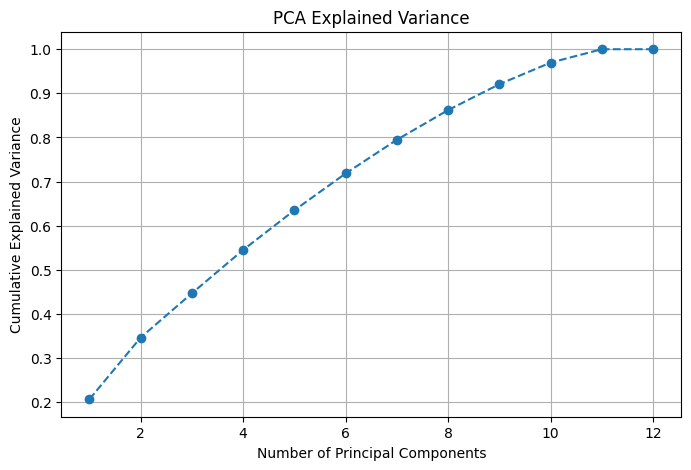

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(num_cols) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

#### Examine principal component loadings 
Each principal component is a linear combination of original features. Examining these can reveal which features influence each PC the most.

Below, I assess the loadings of each feature in each principal component (see printed dataframe). I evaluate PC2 and PC9. PC2 is normally where effective PCA explains >95% of variance, but in this case it only explains about 35% of variance. PC9 explains >90% of variance. That's why I chose to look into these PCs specifically.

**Analysis of PC2 (index 1 in table below)**  
We can see that min_ssd and intersections are strongly opposite in PC2 (index 1). Intersections is very similar to mean_cc8_40m, which were observed in a previous notebook (`hiz_analysis.ipynb`) to be correlated. Furthermore, the loading of min_ssd is very similar to tax_EYB. These two features were observed to be correlated - newer homes are built on more acres and have more distance between homes. This principal component therefore likely represents density vs. spacing. PC2, however, only accounts for about 35% of variance, according to the elbow chart above. So we can infer that structure density and spacing account for approximately 1/3 of the variance of structure features in Ouray County. The canopy features do not rise to the top of feature importance in PC2. This is possibly related to the lack of separation of structures and vegetation in the LiDAR rasters - mean_cc4_8m likely includes measurements of adjacent structures where intersections are greater than 0. Future improvements of this method should include object segmentation with LiDAR, possibly using point clouds and possibly using zentropy values in rasterized point clouds. This will improve confidence in distinguishing between structures and vegetation/artificial fuels such as cars and lawn furniture, improving the unique addition of these fuel cover features to the dataset.

**Analysis of PC9 (index 8 in table below)**  
PC9 explains >90% of the variance, although it does not significantly reduce dimensionality. In this component, hiz features have a weaker presence and structure features have a stronger presence in terms of absolute loading value. tax_EYB (effective year built) has the strongest loading at 0.69. ACRES_calc also has a positive loading at 0.41. These two features were observed to be correlated - newer homes exist on larger properties. Interestingly, tax_RMS (rooms) and tax_SQFT have inverse loading values (0.35 and -0.35, respectively). This would suggest that PC9 distinguishes size of the home vs. number of rooms in the home, possibly representing multi--family housing such as apartments, which are present in this dataset. PC9 is more difficult to evaluate compared  to PC2, but possibly represents multi-family vs. single-family homes as the strongest feature. 

In [51]:
import pandas as pd

# Get component loadings
loadings = pd.DataFrame(pca.components_, columns=num_cols)

# Show first few principal components
loadings

min_ssd  mean_cc0_2m  mean_cc2_4m  mean_cc4_8m  mean_cc8_40m  \
0   4.453405e-02     0.253555     0.524416     0.495007     -0.016024   
1  -4.161103e-01     0.014388     0.008746     0.086290      0.425190   
2   8.955941e-02    -0.251524    -0.275971     0.045888      0.578744   
3   4.676050e-01     0.448087    -0.046773    -0.270360      0.202751   
4   3.265814e-01     0.167334     0.056281     0.027548      0.038957   
5  -2.100018e-01     0.617416     0.065282    -0.406638      0.025731   
6  -1.138974e-01     0.081993     0.123042     0.014321     -0.409939   
7  -1.546187e-01     0.234585    -0.137753    -0.128119      0.298981   
8  -2.398799e-01    -0.087520     0.039101    -0.039054     -0.013939   
9   5.891500e-01    -0.107716    -0.051675     0.094337      0.006671   
10  7.692731e-02    -0.379834     0.711584    -0.537434      0.207269   
11  5.025347e-17    -0.192261    -0.307358    -0.436268     -0.374280   

      sum_cc  intersections    ACRES_calc      tax_SQFT       tax_EYB  \
0   0.572378  -1.388278e-01 -1.359575e-01  3.239080e-02  1.817777e-01   
1   0.275686   4.606347e-01  1.209028e-01 -1.648157e-01 -4.417134e-01   
2   0.141021  -2.290459e-01  9.042531e-02  4.667489e-01  1.553104e-01   
3   0.040499  -3.433172e-01 -6.969714e-02 -3.079230e-01 -1.845496e-01   
4   0.103695   5.989238e-02  7.920597e-01  2.341222e-01 -9.110523e-02   
5  -0.039535   3.131517e-01  4.935152e-02  1.540938e-01  1.717312e-01   
6  -0.127595   6.058985e-03  1.685744e-02  6.150409e-01 -1.138336e-01   
7   0.080114  -2.844260e-02 -3.378529e-01  2.734043e-01  3.446889e-01   
8  -0.036892  -2.971306e-02  4.112767e-01 -3.489923e-01  6.896139e-01   
9   0.009624   7.034415e-01 -1.965422e-01  1.871077e-02  2.609131e-01   
10 -0.015274  -2.049360e-03 -4.316624e-02  7.339268e-02 -2.151801e-02   
11  0.733588  -1.189671e-16 -4.896618e-17  6.468384e-17 -2.243431e-16   

    tax_EXW_PERCENT       tax_RMS  
0     -1.120351e-01  3.752236e-02  
1      2.356262e-01  2.402851e-01  
2     -3.249189e-01  2.956864e-01  
3      2.208229e-01  4.027038e-01  
4      1.861118e-01 -3.470597e-01  
5     -4.983469e-01  2.776014e-02  
6      3.289173e-01  5.299896e-01  
7      5.823497e-01 -3.771200e-01  
8      2.030595e-01  3.486559e-01  
9      6.100640e-02  1.548751e-01  
10     4.830560e-02 -3.711688e-02  
11    -1.324302e-16  8.741422e-17

In [76]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by first 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by first 2 Principal Components:
Principal Component 1: 0.2066
Principal Component 2: 0.1399
Total Cumulative Variance Unexplained:  0.6535


#### Scatterplot the first two PCs
If the dataset has structure, clusters might emerge in the first two principal components.

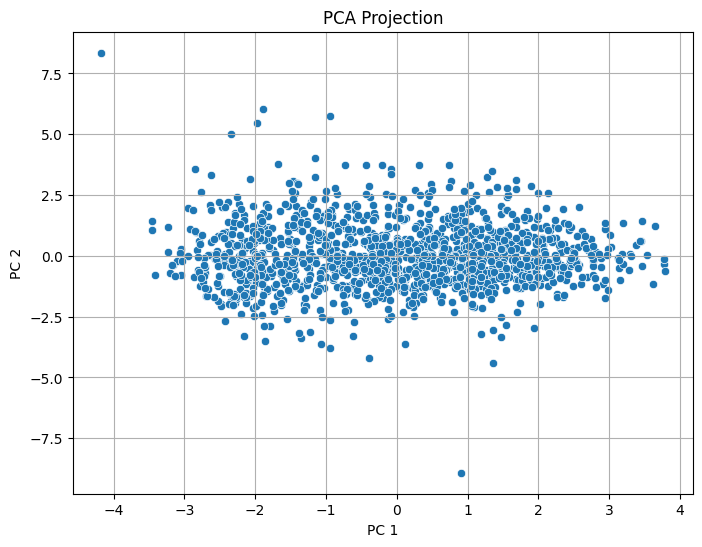

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection')
plt.grid()
plt.show()

#### Check correlation between PCs
Each PC should be uncorrelated with others. If two PCs are highly correlated, it means redundancy still exists.

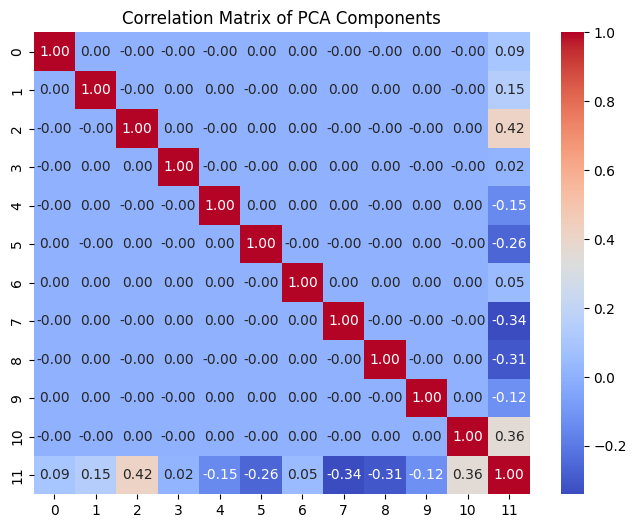

In [31]:
import numpy as np

corr_matrix = np.corrcoef(X_pca.T)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of PCA Components")
plt.show()

#### Re-examining data
Let's look at the correlation of the numeric columns now to see if there is highly-correlated data. That will hamper PCA's ability to reduce dimensionality. We can see from the plot below that 'sum_cc' is correlated with each of the canopy height classes. Furthermore, intersections is correlated with min_ssd and tax_EYB. 

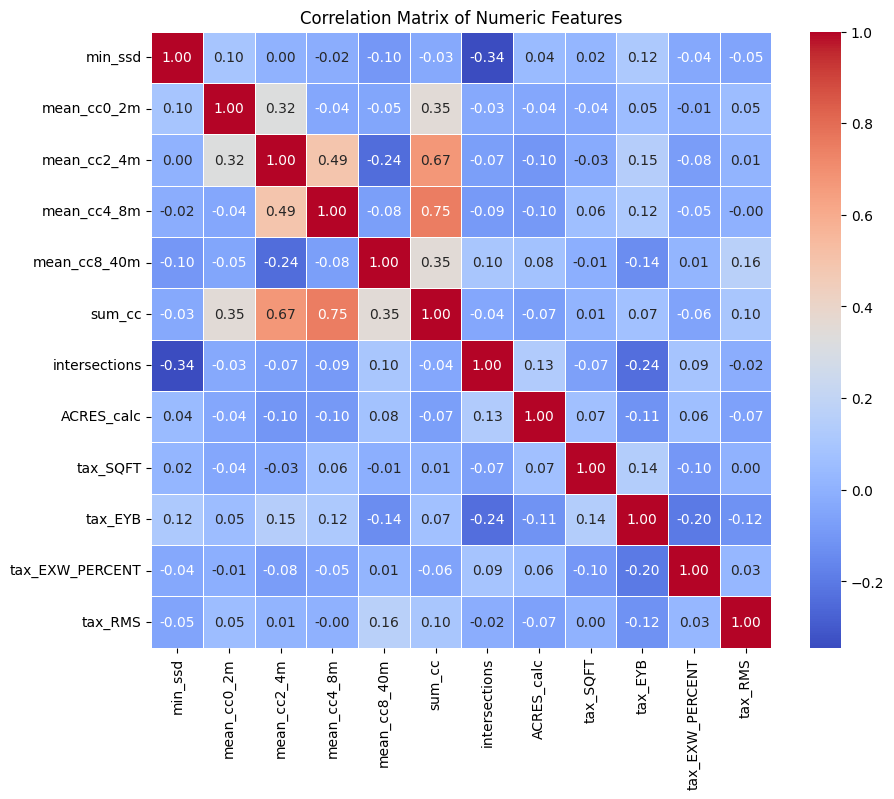

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

After removing and adding certain variables and trying PCA with different combinations of variables, there are not components that can easily reduce dimensionality while explaining 90%+ of variance. We will try reducing dimensionality with t-SNE below.

In the above analysis of PC2 and PC9, we can see that some principal components are comprised with higher representation of hiz features, and some with structure features. It is reasonable to assume that separating hiz and structure features and reducing dimensionality with each feature set separately may improve results and make the results more interpretable. Below, that's what I do.

### HIZ Features Isolated

In [69]:
# hiz cols include SSD, property size and fuel cover
hiz_cols = [
    'min_ssd',
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m',
    'sum_cc',
    'ACRES_calc'
]

# structure cols include structure features and structure density
str_cols = [
    'intersections',
    'tax_SQFT',
    'tax_EYB',
    'tax_EXW_PERCENT',
    'tax_RMS'
]

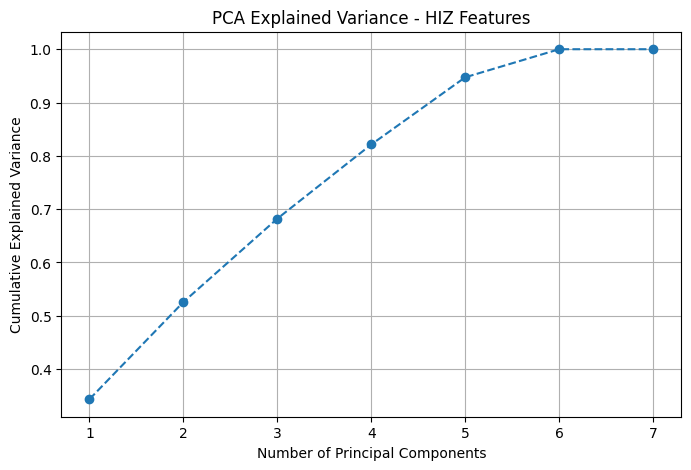

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[hiz_cols])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(hiz_cols) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance - HIZ Features')
plt.grid()
plt.show()

In [60]:
import pandas as pd

# Get component loadings
loadings = pd.DataFrame(pca.components_, columns=hiz_cols)

# Show first few principal components
loadings

min_ssd  mean_cc0_2m  mean_cc2_4m  mean_cc4_8m  mean_cc8_40m  \
0 -6.690563e-03     0.261784     0.536634     0.511668      0.017833   
1 -3.842074e-01    -0.256777    -0.248595     0.078733      0.779421   
2  4.886125e-01     0.591580    -0.030047    -0.309189      0.305563   
3  3.590743e-01    -0.514099     0.035253     0.373573     -0.182945   
4  6.919701e-01    -0.247805    -0.208793     0.132504      0.289640   
5  7.642585e-02    -0.391022     0.714154    -0.537545      0.203398   
6  6.370282e-17    -0.192261    -0.307358    -0.436268     -0.374280   

     sum_cc    ACRES_calc  
0  0.606837 -1.143449e-01  
1  0.273034  1.908079e-01  
2  0.114478  4.564167e-01  
3  0.008859  6.575870e-01  
4  0.074151 -5.560834e-01  
5 -0.019171 -2.349451e-02  
6  0.733588  1.670309e-17

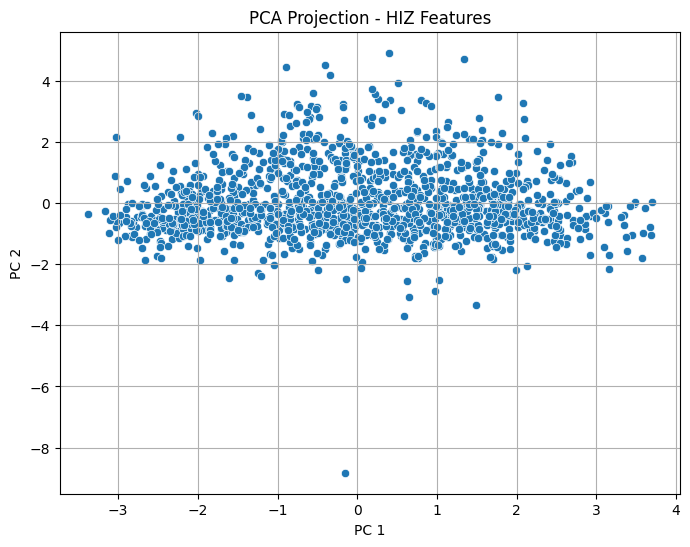

In [61]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection - HIZ Features')
plt.grid()
plt.show()

From the table above the plot, we can see that the first two PCs explain >50% of variance. From the plot above, we can see that no clusters emerge from the first two principal components. 

Below, we look at PC4 and PC5. PC5 explains >90% of variance (cumulatively with other PCs). However, there is very weak clustering evident in the plot. 

In my analysis of HIZ features, it is evident that there are certain types of homes. There are homes on large properties with no structures nearby but with vegetation (of varying height) in the HIZ. And there are homes that are in denser, more urban neighborhoods. Therefore, it is surprising that HIZ features do not effectively reduce in dimensionality. As I commented above, this is possibly due to the fact that the LiDAR fuel cover features do not distinguish between structures and vegetation. Separating these two features would presumably improve dimensionality reduction with principal components.

In [74]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by first 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by first 2 Principal Components:
Principal Component 1: 0.3435
Principal Component 2: 0.1823
Total Cumulative Variance Unexplained:  0.4742


In [73]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by Principal Components 4 and 5:")
print(f"Principal Component 4: {fraction_variance_explained[3]:.4f}")
print(f"Principal Component 5: {fraction_variance_explained[4]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[3] + fraction_variance_explained[4])): .4f}")

Fraction of Variance Explained by Principal Components 4 and 5:
Principal Component 4: 0.1391
Principal Component 5: 0.1260
Total Cumulative Variance Unexplained:  0.7349


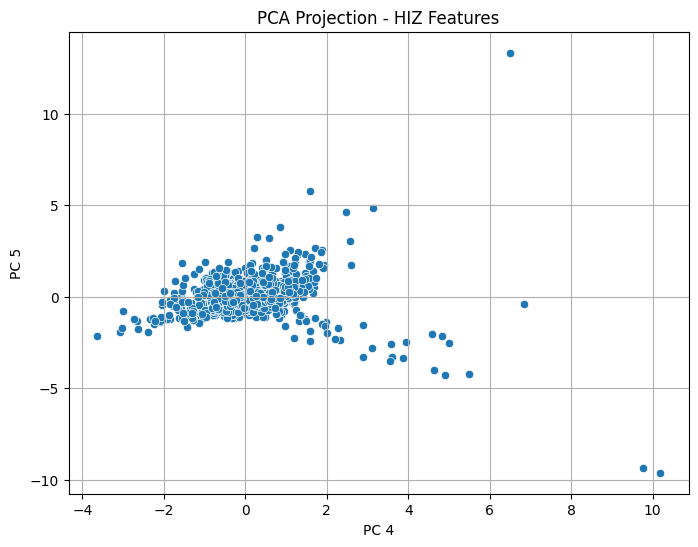

In [64]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,3], y=X_pca[:,4])
plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.title('PCA Projection - HIZ Features')
plt.grid()
plt.show()

### Tax Features Isolated

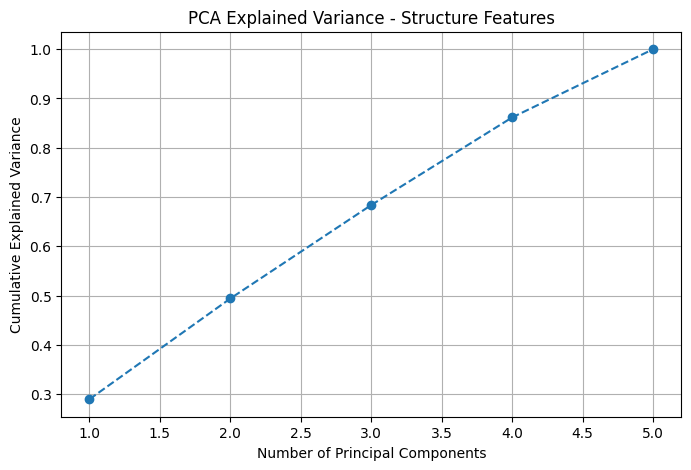

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[str_cols])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(str_cols) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance - Structure Features')
plt.grid()
plt.show()

In [71]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by the First 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by the First 2 Principal Components:
Principal Component 1: 0.2897
Principal Component 2: 0.2044
Total Cumulative Variance Unexplained:  0.5059


Again, it is surprising that dimensionality is not effectively reduced with tax features being isolated from hiz features. The features include 'intersections','tax_SQFT','tax_EYB','tax_EXW_PERCENT','tax_RMS'. In a map, we can observe that there are clusters of homes with high intersections values, and clusters of homes with no other homes around. We can observe in our analysis of features that there are large homes and small homes. There are old homes and new homes. Therefore, we would expect that dimensionality could be reduced in these features, but that is not the case, as the first two PCs only explain ~50% of variance, according to the plot above. In future iterations of this workflow, we could create two different columns for intersections: one in the HIZ at ~30m and one at ~100m to see if that impacts the ability to segment homes, because there are several 'compounds' that can be seen on the map in which a home might have 3 structures in its immediate surroundings and then not another structure for hundreds of meters, or over a mile.

In PCA, we are limited to numeric variables as opposed to categorical variables. The categorical variables, however, were more effective in predicting risk scores, as evaluated in `risk_pred.ipynb`.

## Reducing Dimensionality - t-SNE 
---
Here we use t-distributed stochastic neighbor embedding (t-SNE) to reduce dimensionality. We evaluate the performance and compare to PCA.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Select numeric features
X = df[num_cols].copy()

# Standardize numeric data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
cat_cols

['wui_class',
 'hix_ext_out',
 'tax_ARCH',
 'tax_EXW',
 'tax_HTFL',
 'tax_RCVR',
 'tax_RSTR',
 'Type',
 'tax_DGR',
 'tax_PTO',
 'tax_WBL',
 'tax_OPP']

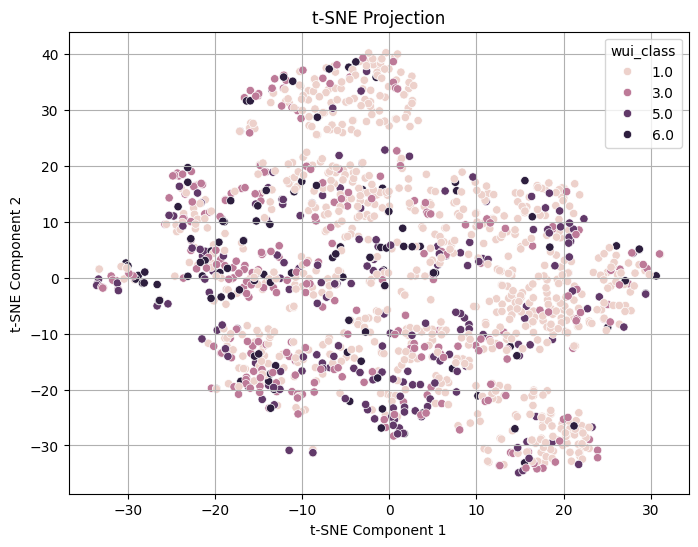

In [140]:
# Apply t-SNE
tsne = TSNE(n_components=2, 
            perplexity = 45, 
            max_iter = 800,
            random_state=42
           )
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Plot the data in 2D with associated labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df['wui_class'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection")
plt.grid()
plt.show()

We're starting to see some structure being revealed with t-SNE. However, these clusters to not map to risk rating very well, as we can see when we color the points by their risk rating (or re-scaled risk rating, or wui_class, or any other categorical variable). Let's try varying the 'perplexity' parameter. From the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), perplexity is related to the number of nearest neighbors that are used. Larger datasets usually require a larger perplexity. Below, we vary perplexity between 5 and 50 (recommended in the package documentation) and compare the results visually.

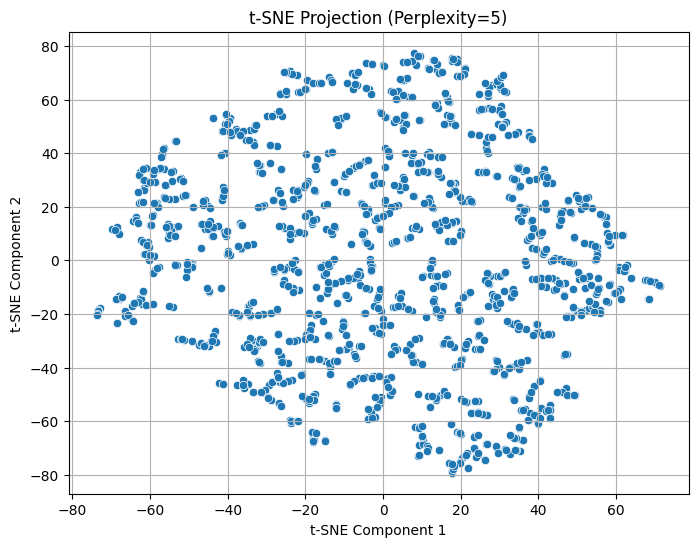

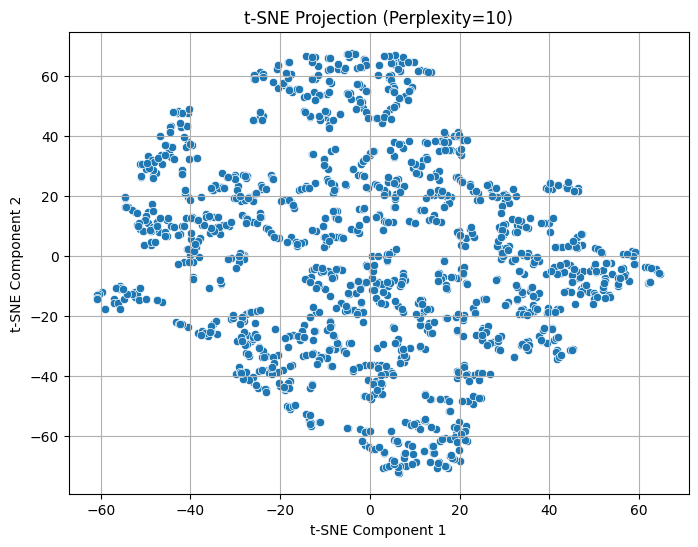

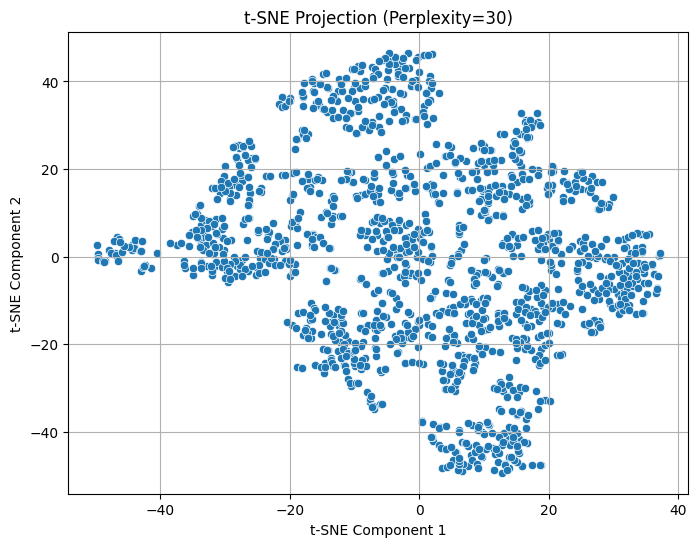

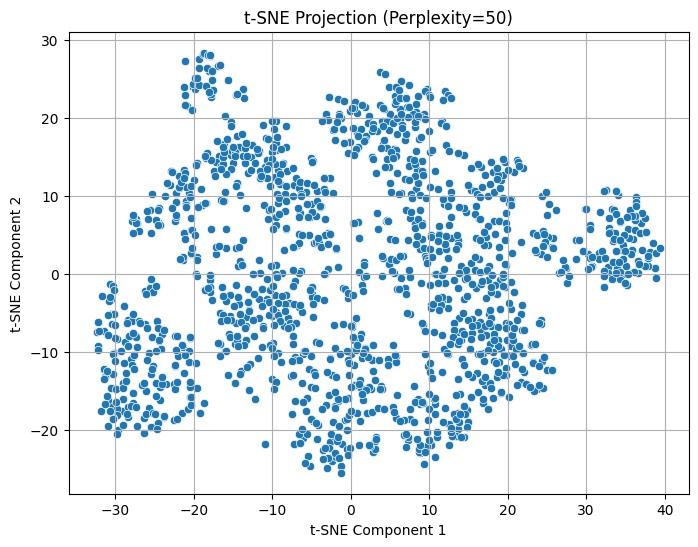

In [98]:
for perplexity in [5, 10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=750, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])
    plt.title(f"t-SNE Projection (Perplexity={perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid()
    plt.show()

We can see from the plots above that - at least visually - we get some gains between perplexity values of 10 and 30. However, it appears that we get diminishing returns between 30 and 50. Let's plot 25, 35, and 45.

I vary the color by different categorical variables, so the point colors represent a different variable depending on which one I looked at last. The two most interesting to look at are Risk_Rating and wui_class.

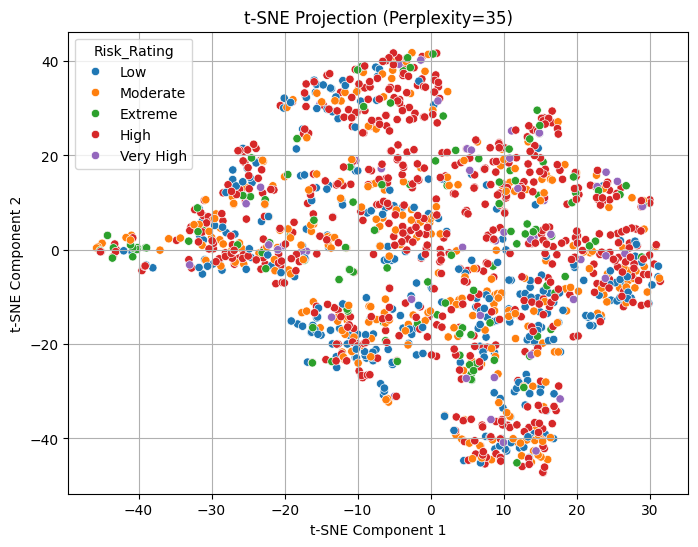

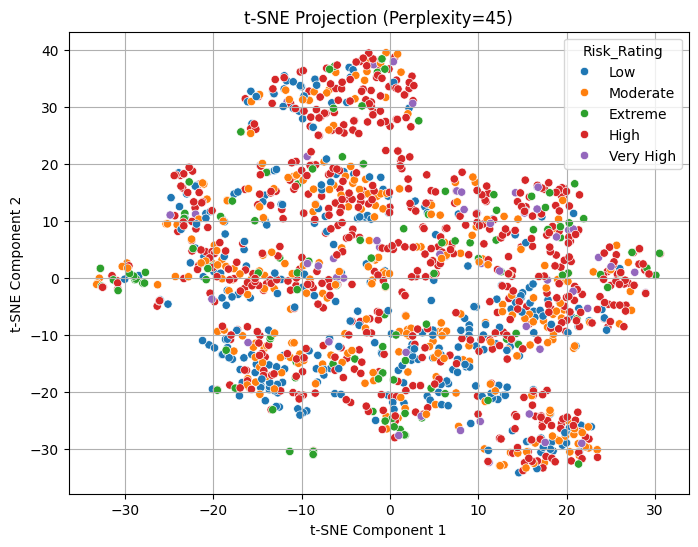

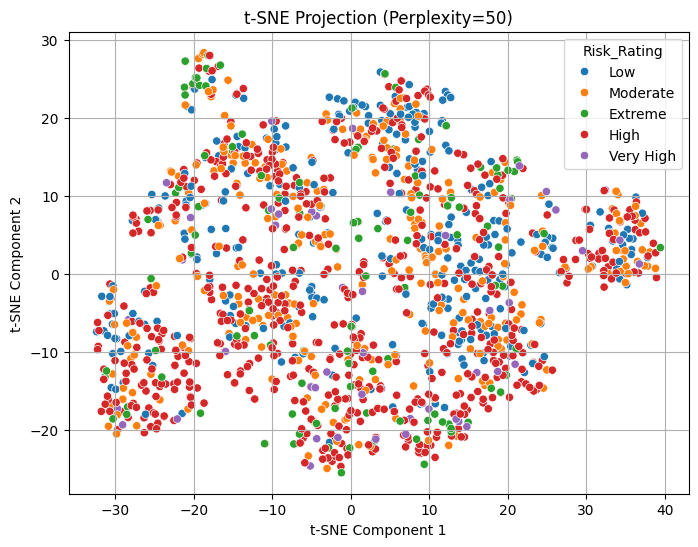

In [152]:
for perplexity in [35, 45, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=750, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Risk_Rating'])
    plt.title(f"t-SNE Projection (Perplexity={perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid()
    plt.show()

There is a noticeable visual difference between perplexity values of 35, 45 and 50. It will be interesting to look at these three outcomes individually in greater detail. How effective will different methods of clustering be on the dataset with dimensionality reduced via t-SNE? We will look at that later, but first, we're going to try t-SNE with isolated hiz and structure features to see what the clusters look like.

In the plots above, I varied point color by different known categorical variables. There is not much structure in the data, but wui_class shows interesting separation, and it's notable that roof cover (tax_RCVR) has an outlying group of WOOD roofs. Not perfectly segmented, but definitely is showing up as the dominant force of that outlying cluster. That same cluster has fewer structures with HIZ extending out of the property boundary (hiz_ext_out) which suggests that homes on larger properties are more likely to have wood roofs. Risk Rating does not cluster well.

In [123]:
# hiz cols include SSD, property size and fuel cover
hiz_cols = [
    'min_ssd',
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m',
    'sum_cc',
    'ACRES_calc'
]

# structure cols include structure features and structure density
str_cols = [
    'intersections',
    'tax_SQFT',
    'tax_EYB',
    'tax_EXW_PERCENT',
    'tax_RMS'
]

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize HIZ Features
scaler_hiz = StandardScaler()
X_hiz = scaler_hiz.fit_transform(df[hiz_cols])

# Standardize Structure Features
scaler_str = StandardScaler()
X_str = scaler_str.fit_transform(df[str_cols])

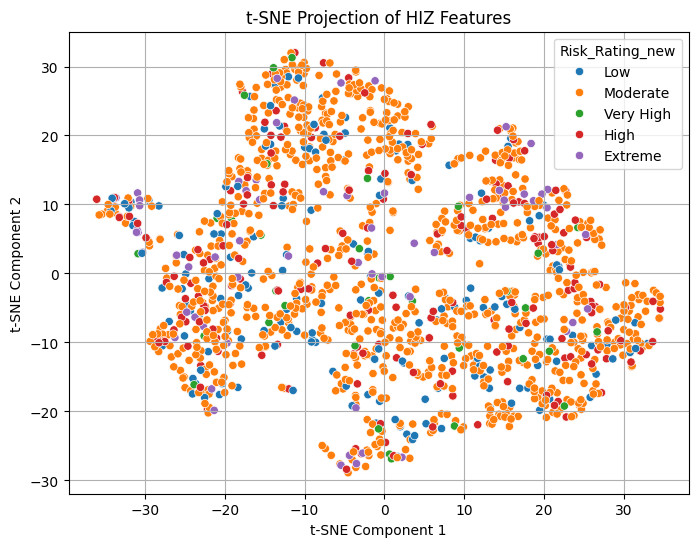

In [150]:
tsne_hiz = TSNE(n_components=2, perplexity=45, max_iter=800, random_state=42)
X_hiz_tsne = tsne_hiz.fit_transform(X_hiz)

# Convert to DataFrame
df_hiz_tsne = pd.DataFrame(X_hiz_tsne, columns=['TSNE1', 'TSNE2'])

# Plot t-SNE Results for HIZ
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_hiz_tsne['TSNE1'], y=df_hiz_tsne['TSNE2'], hue=df['Risk_Rating_new'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of HIZ Features")
plt.grid()
plt.show()

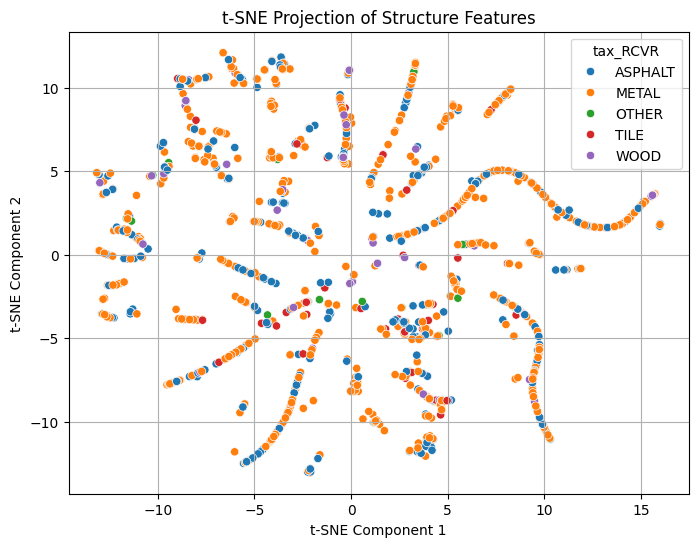

In [151]:
tsne_str = TSNE(n_components=2, perplexity=25, max_iter=300, random_state=42)
X_str_tsne = tsne_str.fit_transform(X_str)

# Convert to DataFrame
df_str_tsne = pd.DataFrame(X_str_tsne, columns=['TSNE1', 'TSNE2'])

# Plot t-SNE Results for Structure Features
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_str_tsne['TSNE1'], y=df_str_tsne['TSNE2'], hue=df['tax_RCVR'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Structure Features")
plt.grid()
plt.show()


According to research, t-SNE is notoriously difficult to interpret due to its nonlinear, probabilistic embedding that distorts global structures to preserve local relationships. Something interesting that we can see with the structure features is the octopus-like grouping of features, which remains similar when I tune the hyperparameters (primarily perplexity and max_iter). This suggests that the data may not be truly clustered, but rather follow a continuous distribution, where values smoothly increase or decrease, rather than forming separate groups. This suggests that clustering may be better performed on categorical data, if I could transform the categorical data into numeric values. The octopus-like result also may mean that some values dominate. It could also mean that t-SNE is revealing feature interactions that make sense in higher dimensions but look weird in 2D. 

The poor clustering of HIZ values suggests that noise dominates the dataset. 

## Reducing Dimensionality - Cateogorical Data Encoding
---

In [162]:
# What are the columns, how many unique values, and what are the values?
for col in cat_cols:
    print(f'Column: {col}, {df[col].nunique()} values')
    print(df[col].unique())

Column: wui_class, 4 values
[1 3 5 6]
Column: hiz_ext_out, 2 values
[False  True]
Column: tax_ARCH, 8 values
['SINGLE STORY' 'MULTI STORY' 'COMMERCIAL' 'CUSTOM' 'MANUFACTURED'
 'ALTERNATIVE' 'LOG' 'MULTI FAMILY']
Column: tax_EXW, 4 values
['CONC/MSNRY' 'METAL' 'WOOD' 'MANFCTD']
Column: tax_HTFL, 4 values
['GAS' 'STOVE' 'ELECTRIC' 'PROPANE']
Column: tax_RCVR, 5 values
['ASPHALT' 'METAL' 'OTHER' 'TILE' 'WOOD']
Column: tax_RSTR, 5 values
['GABLE' 'MANSARD' 'SHED' 'MULTI_PEAK' 'OTHER']
Column: Type, 3 values
['Residence' 'Commercial' 'Mobile Home']
Column: tax_DGR, 3 values
['None' 'Large' 'Small']
Column: tax_PTO, 3 values
['Large' 'None' 'Small']
Column: tax_WBL, 3 values
['None' 'Small' 'Large']
Column: tax_OPP, 3 values
['Large' 'Small' 'None']


I've printed my categorical variables and their unique values above. Here is how we are going to treat each variable:

- `wui_class`: convert from int to str value and one-hot encode (OHE). This dtype transformation is because these values are nominal, not ordinal.
- `hiz_ext_out`: leave as-is, because it's already binary encoded
- `tax_ARCH`: one-hot encode (OHE). 8 categories are manageable but may dominate t-SNE. We'll see.
- `tax_EXW`: change metal to manfctd so there are only 3 categories, then OHE
- `tax_HTFL`: drop, because there is little evidence in the literature that this is predictive of structure loss. To keep the dataset from blowing up with OHE, I'm dropping it.
- `tax_RCVR`: OHE
- `tax_RSTR`: OHE
- `Type`: drop, because nearly all observations are 'Residential', so there is little information to be gained
- `tax_DGR`: convert to numeric (ordinal encoding)
- `tax_PTO`: convert to numeric (ordinal encoding)
- `tax_WBL`: convert to numeric (ordinal encoding)
- `tax_OPP`: convert to numeric (ordinal encoding)

In [164]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OHE
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Convert wui_class from int to string
df['wui_class'] = df['wui_class'].astype(str)

# Reduce categories in tax_EXW
df['tax_EXW'] = df['tax_EXW'].replace({'METAL': 'MANFCTD'})

# Drop tax_HTFL and Type from cat_cols list
for col in ['Type', 'tax_HTFL']:
    cat_cols.remove(col)

# Convert last 4 columns to numeric for ordinal encoding
size_map = {'None': 1, 'Small': 2, 'Large': 3}
df['tax_DGR'] = df['tax_DGR'].map(size_map)
df['tax_PTO'] = df['tax_PTO'].map(size_map)
df['tax_WBL'] = df['tax_WBL'].map(size_map)
df['tax_OPP'] = df['tax_OPP'].map(size_map)

# OHE cols
ohe_cols = ['wui_class', 'tax_ARCH', 'tax_EXW', 'tax_RCVR', 'tax_RSTR']
ohe_array = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(ohe_cols))
df = pd.concat([df, ohe_df], axis=1)

df.head()


rwra_index  feat_index    parcel_num    Year              address  \
4         5.0       921.0  4.039351e+11  2017.0  416 COUNTY ROAD 22A   
5         6.0       509.0  4.039264e+11  2017.0  3100 COUNTY ROAD 22   
6         7.0      1296.0  4.039263e+11  2017.0  3245 COUNTY ROAD 22   
7         8.0       727.0  4.039363e+11  2017.0   4452 COUNTY ROAD 1   
8         9.0      1332.0  4.039352e+11  2017.0  3479 COUNTY ROAD 22   

      ParcelNum Model  Address_Visible  Driveway_Clearance  Driveway_Lenth  \
4  4.039351e+11     B              5.0                 0.0            11.0   
5  4.039264e+11     B             15.0                 0.0            11.0   
6  4.039263e+11     B              0.0                 0.0            11.0   
7  4.039363e+11     B              5.0                 5.0            11.0   
8  4.039352e+11     B              5.0                 5.0            11.0   

   Dist_to_Danger_Topo  Slope_Final  Background_Fuels  Defensible_Space  \
4                  0.0          0.0              10.0              50.0   
5                  0.0          0.0              10.0               0.0   
6                  0.0          0.0              20.0              50.0   
7                  0.0          0.0              10.0               0.0   
8                  0.0          0.0              10.0               0.0   

   Roofing_Material  Building_Exterior  Other_Combustibles  Decks_and_Fencing  \
4               0.0                0.0                 0.0                0.0   
5               0.0                0.0                80.0                0.0   
6               0.0                0.0                 0.0                0.0   
7               0.0               70.0                 0.0              100.0   
8               0.0               70.0                80.0                0.0   

   Proximity_to_Neighboring_Home  Ingress_Egress  Score_Final Risk_Rating  \
4                            0.0             0.0         76.0         Low   
5                            0.0             0.0        116.0         Low   
6                          100.0             0.0        181.0         Low   
7                           50.0             0.0        251.0    Moderate   
8                            0.0             0.0        181.0         Low   

         County wui_class     min_ssd  mean_cc0_2m  mean_cc2_4m  mean_cc4_8m  \
4  Ouray County         1  211.505051     0.048738     0.084885     0.034318   
5  Ouray County         3  180.054332     0.023967     0.015273     0.000271   
6  Ouray County         1    5.979973     0.032157     0.101354     0.136954   
7  Ouray County         3   20.479874     0.025695     0.047097     0.039426   
8  Ouray County         5  100.486083     0.018661     0.045186     0.068360   

   mean_cc8_40m  intersections      PARCELNB  ACCOUNT  ACRES_calc hiz_ext_out  \
4       0.00000            0.0  4.039351e+11  R000531   32.728300       False   
5       0.00004            0.0  4.039264e+11  R005599    9.707660       False   
6       0.00000            1.0  4.039263e+11  R004277    0.822618        True   
7       0.00012            1.0  4.039363e+11  R004198   38.439600       False   
8       0.00000            0.0  4.039352e+11  R004237   12.296800        True   

   tax_AIRC      tax_ARCH  tax_SQFT       tax_COND  tax_EYB  tax_EXW_PERCENT  \
4  1 - NONE  SINGLE STORY    4034.9       3 - GOOD   2015.0            100.0   
5  1 - NONE   MULTI STORY    1942.0  2 - VERY GOOD   2010.0            100.0   
6  1 - NONE    COMMERCIAL    1579.0    4 - AVERAGE   2000.0            100.0   
7  1 - NONE   MULTI STORY    2865.0       3 - GOOD   2000.0            100.0   
8  1 - NONE   MULTI STORY    1696.0       3 - GOOD   2000.0            100.0   

      tax_EXW     tax_FLR tax_FRME  tax_HTFL  tax_INT   tax_RMS tax_RCVR  \
4  CONC/MSNRY       WDJST     WOOD       GAS  DRYWALL  0.776148  ASPHALT   
5  CONC/MSNRY       WDJST     WOOD       GAS  DRYWALL  0.776148    METAL   
6     MANFCTD  CONC/MSN

Now let's select the numeric columns and alter our num_cols list accordingly.

In [165]:
num_cols

['min_ssd',
 'mean_cc0_2m',
 'mean_cc2_4m',
 'mean_cc4_8m',
 'mean_cc8_40m',
 'sum_cc',
 'intersections',
 'ACRES_calc',
 'tax_SQFT',
 'tax_EYB',
 'tax_EXW_PERCENT',
 'tax_RMS']

In [167]:
temp_ls = [
    'hiz_ext_out',
    'tax_WBL',
    'tax_DGR',
    'tax_PTO',
    'tax_OPP',
    'wui_class_3',
    'wui_class_5',
    'wui_class_6',
    'tax_ARCH_COMMERCIAL',
    'tax_ARCH_CUSTOM',
    'tax_ARCH_LOG',
    'tax_ARCH_MANUFACTURED',
    'tax_ARCH_MULTI FAMILY',
    'tax_ARCH_MULTI STORY',
    'tax_ARCH_SINGLE STORY',
    'tax_EXW_MANFCTD',
    'tax_EXW_WOOD',
    'tax_RCVR_METAL', 
    'tax_RCVR_OTHER', 
    'tax_RCVR_TILE', 
    'tax_RCVR_WOOD',
    'tax_RSTR_MANSARD', 
    'tax_RSTR_MULTI_PEAK', 
    'tax_RSTR_OTHER',
    'tax_RSTR_SHED'
]

num_cols.extend(temp_ls)

num_cols

['min_ssd',
 'mean_cc0_2m',
 'mean_cc2_4m',
 'mean_cc4_8m',
 'mean_cc8_40m',
 'sum_cc',
 'intersections',
 'ACRES_calc',
 'tax_SQFT',
 'tax_EYB',
 'tax_EXW_PERCENT',
 'tax_RMS',
 'hiz_ext_out',
 'tax_WBL',
 'tax_DGR',
 'tax_PTO',
 'tax_OPP',
 'wui_class_3',
 'wui_class_5',
 'wui_class_6',
 'tax_ARCH_COMMERCIAL',
 'tax_ARCH_CUSTOM',
 'tax_ARCH_LOG',
 'tax_ARCH_MANUFACTURED',
 'tax_ARCH_MULTI FAMILY',
 'tax_ARCH_MULTI STORY',
 'tax_ARCH_SINGLE STORY',
 'tax_EXW_MANFCTD',
 'tax_EXW_WOOD',
 'tax_RCVR_METAL',
 'tax_RCVR_OTHER',
 'tax_RCVR_TILE',
 'tax_RCVR_WOOD',
 'tax_RSTR_MANSARD',
 'tax_RSTR_MULTI_PEAK',
 'tax_RSTR_OTHER',
 'tax_RSTR_SHED']

In [169]:
print(f'there are {len(num_cols)} predictive features')

there are 37 predictive features


37 predictive features is not crazy-high dimensionality, but based on the t-SNE I performed above, I expect that there could be a lot of noise in this dataset. Furthermore, architecture type is rather dominant in these features, making up about 1/5 of all features after one-hot encoding. We will see how the t-SNE performs as-is. Then, we can experiment with adjusting achitecture to possible only include less features. 

Additionally, there are noisy features such as the LiDAR raster measurements that we could possibly remove. Let's dive in and take it from there. 

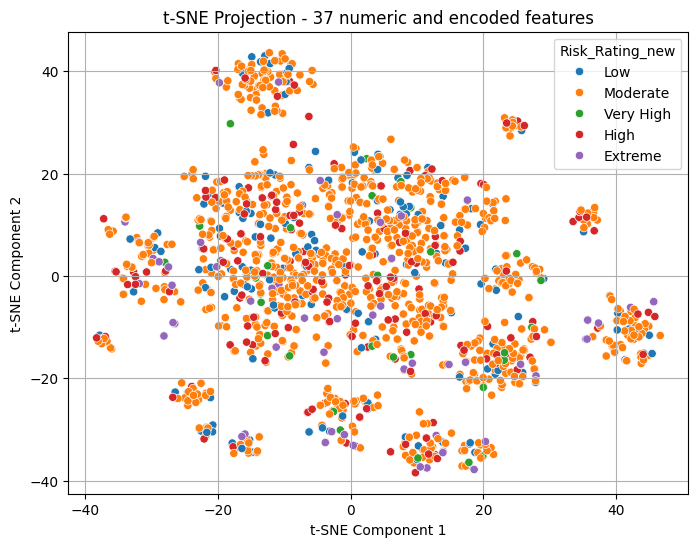

In [202]:
# Scale features
from sklearn.preprocessing import StandardScaler

# Select num_cols
X_final = df[num_cols]
X_final = X_final.dropna() # Optionally drop NaN rows (there are 8 rows with NaN values in this dataset)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

##################################
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=45, max_iter=999, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Visualize t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df['Risk_Rating_new'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection - 37 numeric and encoded features")
plt.grid()
plt.show()


There are now emerging clusters from t-SNE, and I have set the hyperparameters for the clearest clustering. This is probably sufficient clustering to be able to separate with DBSCAN or K-Means. However, I am going to try reducing the noise in the data to see if we get better clustering with fewer features. When I color points by numeric or categorical data, there is no clear cluster separation (e.g. by risk rating, year built, architecture style, square footage, property acreage, roof cover, etc.). Therefore, this will take some more detailed exploration to determine what the clusters are and how homes are characterized.

My next steps are to reduce and further transform the data. Based on the improved t-SNE with the inclusion of categorical variables, it is reasonable to believe that classifying some of my numeric data (such as the LiDAR rasters) into classes of fuel volume (e.g. x < mean_cc0_2m < y etc.) will reduce noise and improve clustering. Additionally, removing or consolidating some of the architecture categories may lead to improved clustering.

In [203]:
num_cols

['min_ssd',
 'mean_cc0_2m',
 'mean_cc2_4m',
 'mean_cc4_8m',
 'mean_cc8_40m',
 'sum_cc',
 'intersections',
 'ACRES_calc',
 'tax_SQFT',
 'tax_EYB',
 'tax_EXW_PERCENT',
 'tax_RMS',
 'hiz_ext_out',
 'tax_WBL',
 'tax_DGR',
 'tax_PTO',
 'tax_OPP',
 'wui_class_3',
 'wui_class_5',
 'wui_class_6',
 'tax_ARCH_COMMERCIAL',
 'tax_ARCH_CUSTOM',
 'tax_ARCH_LOG',
 'tax_ARCH_MANUFACTURED',
 'tax_ARCH_MULTI FAMILY',
 'tax_ARCH_MULTI STORY',
 'tax_ARCH_SINGLE STORY',
 'tax_EXW_MANFCTD',
 'tax_EXW_WOOD',
 'tax_RCVR_METAL',
 'tax_RCVR_OTHER',
 'tax_RCVR_TILE',
 'tax_RCVR_WOOD',
 'tax_RSTR_MANSARD',
 'tax_RSTR_MULTI_PEAK',
 'tax_RSTR_OTHER',
 'tax_RSTR_SHED']

In [206]:
# Remove some columns to reduce noise

cols2drop = [
    'sum_cc',
    'tax_EXW_PERCENT',
    'tax_ARCH_CUSTOM',
    'tax_ARCH_MANUFACTURED',
    'tax_RCVR_OTHER',
    'tax_RSTR_OTHER'
]
num_cols_2 = list(set(num_cols) - set(cols2drop))
num_cols_2

['tax_ARCH_COMMERCIAL',
 'mean_cc4_8m',
 'wui_class_6',
 'tax_ARCH_LOG',
 'mean_cc0_2m',
 'tax_EXW_WOOD',
 'tax_RCVR_WOOD',
 'tax_ARCH_MULTI STORY',
 'tax_OPP',
 'ACRES_calc',
 'tax_RSTR_SHED',
 'tax_EXW_MANFCTD',
 'tax_ARCH_SINGLE STORY',
 'wui_class_3',
 'min_ssd',
 'mean_cc8_40m',
 'tax_RSTR_MULTI_PEAK',
 'tax_ARCH_MULTI FAMILY',
 'tax_RCVR_METAL',
 'wui_class_5',
 'tax_SQFT',
 'intersections',
 'tax_RMS',
 'tax_EYB',
 'tax_DGR',
 'tax_WBL',
 'tax_RCVR_TILE',
 'hiz_ext_out',
 'tax_RSTR_MANSARD',
 'mean_cc2_4m',
 'tax_PTO']

In [210]:
# Simplify lidar cols to categorical data
lidar_cols = [
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m'
]

for col in lidar_cols:
    print(f'{col} min: {np.nanmin(df[col])}\n{col} max: {np.nanmax(df[col])}')

mean_cc0_2m min: 0.0036369978915899
mean_cc0_2m max: 0.34418985247612
mean_cc2_4m min: 0.0
mean_cc2_4m max: 0.3842147290706634
mean_cc4_8m min: 0.0
mean_cc4_8m max: 0.5278424620628357
mean_cc8_40m min: 0.0
mean_cc8_40m max: 0.5325839519500732


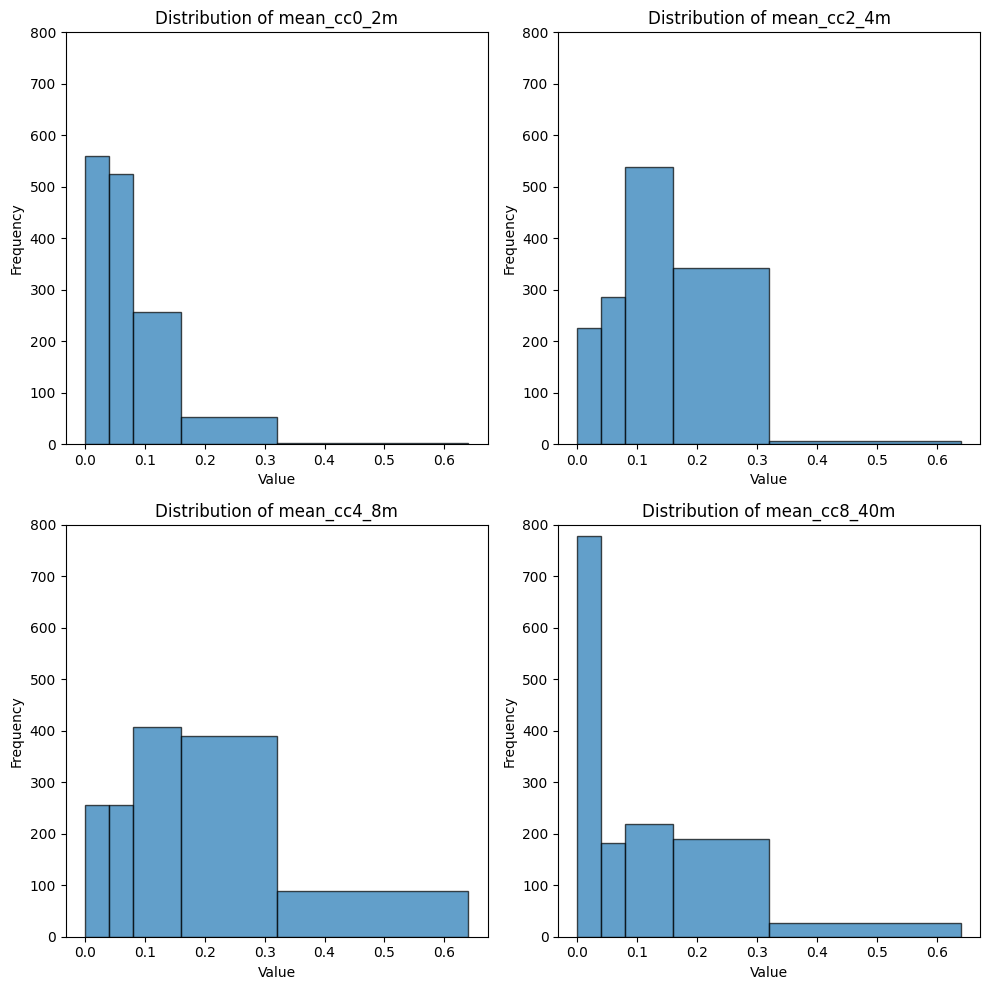

In [326]:
# View distribution of LiDAR raster values in bins
# bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
bins = [0, 0.04, 0.08, 0.16, 0.32, 0.64]

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(lidar_cols):
    axes[i].hist(df[col], bins=bins, edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
    axes[i].set_ylim([0, 800])

plt.tight_layout()
plt.show()

In [327]:
# Cateogirze canopy closure values according to bin breaks
bins = [-1, 0, 0.04, 0.08, 0.16, 0.32, 0.64]
labels = [0, 1, 2, 3, 4, 5]
new_cols = ['fc2m', 'fc4m', 'fc8m', 'fc8m+']

for col, name in zip(lidar_cols, new_cols):
    df[name] = pd.cut(df[col], bins=bins, labels=labels, right=True)

df[new_cols].head()

fc2m fc4m fc8m fc8m+
4    2    3    1     0
5    1    1    1     1
6    1    3    3     0
7    1    2    1     1
8    1    2    2     0

In [218]:
# Remove old lidar cols and add new classified ones
for old, new in zip(lidar_cols, new_cols):
    if old in num_cols_2:
        num_cols_2.remove(old)
    num_cols_2.append(new)

In [219]:
num_cols_2

['tax_ARCH_COMMERCIAL',
 'wui_class_6',
 'tax_ARCH_LOG',
 'tax_EXW_WOOD',
 'tax_RCVR_WOOD',
 'tax_ARCH_MULTI STORY',
 'tax_OPP',
 'ACRES_calc',
 'tax_RSTR_SHED',
 'tax_EXW_MANFCTD',
 'tax_ARCH_SINGLE STORY',
 'wui_class_3',
 'min_ssd',
 'tax_RSTR_MULTI_PEAK',
 'tax_ARCH_MULTI FAMILY',
 'tax_RCVR_METAL',
 'wui_class_5',
 'tax_SQFT',
 'intersections',
 'tax_RMS',
 'tax_EYB',
 'tax_DGR',
 'tax_WBL',
 'tax_RCVR_TILE',
 'hiz_ext_out',
 'tax_RSTR_MANSARD',
 'tax_PTO',
 'fc2m',
 'fc4m',
 'fc8m',
 'fc8m+']

In [220]:
print(np.nanmin(df['intersections']))
print(np.nanmax(df['intersections']))

0.0
6.0


#### Classify intersections
- 0 = 0 (None)
- 1-2 = 1 (Few)
- 3-6 = 2 (Many)

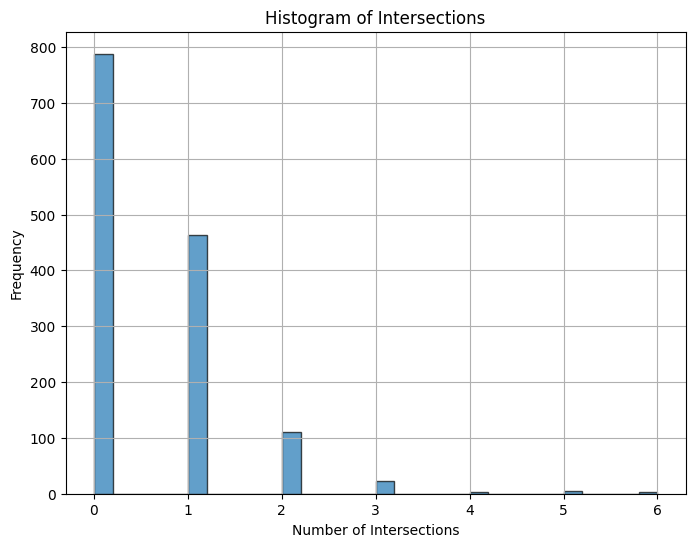

In [221]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['intersections'], bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Number of Intersections")
plt.ylabel("Frequency")
plt.title("Histogram of Intersections")
plt.grid(True)

# Show the plot
plt.show()

In [222]:
# Define bins and labels
bins = [-1, 0, 2, 6]
labels = [0, 1, 2]
# create new classified column
df['intsc_class'] = pd.cut(df['intersections'], bins=bins, labels=labels, right=True)
# Remove old col from num_cols and append new
num_cols_2.remove('intersections')
num_cols_2.append('intsc_class')

In [225]:
df[['intersections', 'intsc_class']].head()

intersections intsc_class
4            0.0           0
5            0.0           0
6            1.0           1
7            1.0           1
8            0.0           0

#### Classify Acres and Sqft

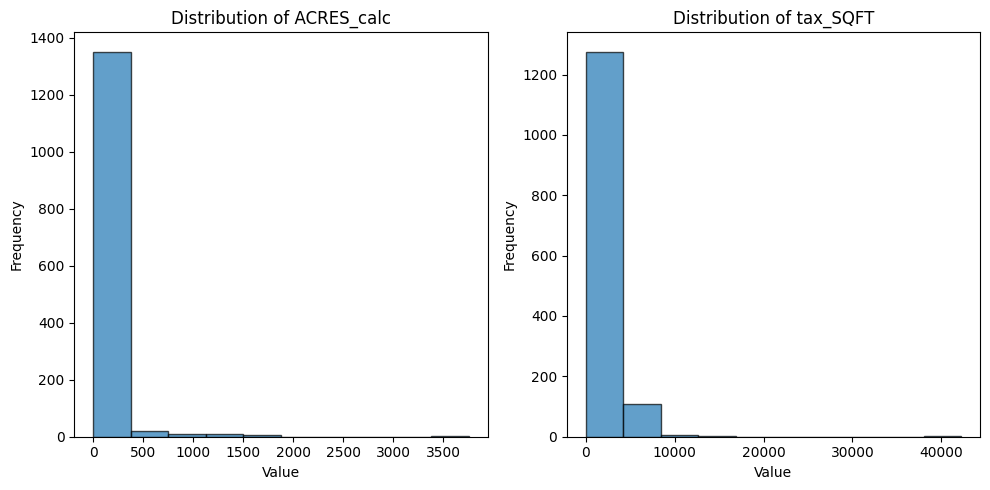

In [226]:
import matplotlib.pyplot as plt

cols = ['ACRES_calc', 'tax_SQFT']

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
# Define bin edges for ACRES_calc and tax_SQFT
acre_bins = [-float('inf'), 1, 3, 5, 10, 100, 1000, float('inf')]
sqft_bins = [-float('inf'), 1500, 3000, 5000, float('inf')]

# Compute counts per bin without modifying the DataFrame
acre_counts = pd.cut(df['ACRES_calc'], bins=acre_bins, right=True).value_counts()
sqft_counts = pd.cut(df['tax_SQFT'], bins=sqft_bins, right=True).value_counts()

# Print out the counts for each bin
print("ACRES_calc Bin Counts:")
print(acre_counts)

print("\nTax_SQFT Bin Counts:")
print(sqft_counts)

ACRES_calc Bin Counts:
ACRES_calc
(10.0, 100.0]      437
(1.0, 3.0]         356
(3.0, 5.0]         186
(-inf, 1.0]        170
(5.0, 10.0]        159
(100.0, 1000.0]     71
(1000.0, inf]       17
Name: count, dtype: int64

Tax_SQFT Bin Counts:
tax_SQFT
(1500.0, 3000.0]    739
(3000.0, 5000.0]    329
(-inf, 1500.0]      264
(5000.0, inf]        64
Name: count, dtype: int64


In [ ]:
acre_labels = [1, 2, 3, 4, 5, 6, 7]
sqft_labels = [1, 2, 3, 4]

df['acre_class'] = pd.cut(df['ACRES_calc'], bins=acre_bins, labels=acre_labels, right=True)
df['sqft_class'] = pd.cut(df['tax_SQFT'], bins=sqft_bins, labels=sqft_labels, right=True)

num_cols_2.remove('ACRES_calc')
num_cols_2.append('acre_class')
num_cols_2.remove('tax_SQFT')
num_cols_2.append('sqft_class')

In [ ]:
df[['acre_class', 'sqft_class']].head()

acre_class sqft_class
4          5          3
5          4          2
6          1          2
7          5          2
8          5          2

#### Reclass Structure Separation Distance
Here, structure separation is classified according to NIST's Hazard Mitigation Methodology (Maranghides et al. 2022). In the report, NIST classifies different types of WUI according to structure density. Table 2 on Pg 8 of the report provides classes of 6-30, 30-100, and 100+ for structure separation distance. This is combined with qualitative WUI descriptions involving structure density of the neighborhood. In this way, I could possibly combine ssd and intersections to say "ssd is low and intersections are many, that's a high-exposure house for s2s fire spread."

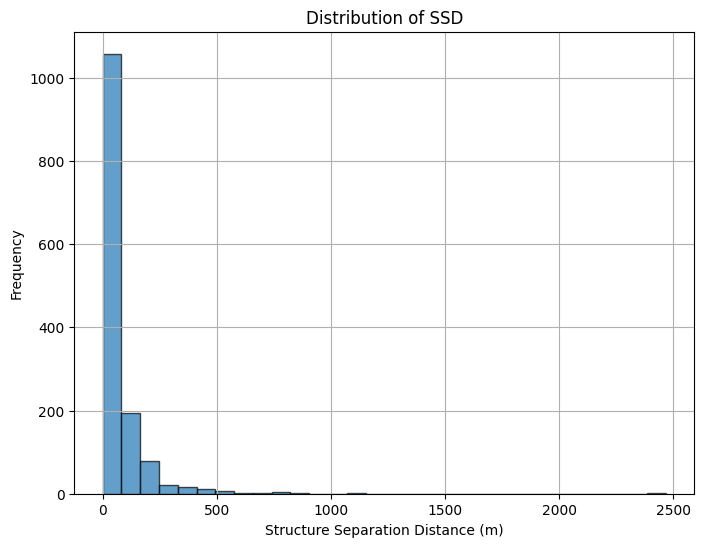

In [235]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['min_ssd'], bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Structure Separation Distance (m)")
plt.ylabel("Frequency")
plt.title("Distribution of SSD")
plt.grid(True)

# Show the plot
plt.show()

In [237]:
ssd_bins = [-float('inf'), 10, 30, float('inf')]

ssd_counts = pd.cut(df['min_ssd'], bins=ssd_bins, right=True).value_counts()

# Print out the counts for each bin
print("min_ssd Bin Counts:")
print(ssd_counts)

min_ssd Bin Counts:
min_ssd
(30.0, inf]     821
(10.0, 30.0]    362
(-inf, 10.0]    213
Name: count, dtype: int64


In [243]:
ssd_labels = [1, 2, 3]

df['ssd_class'] = pd.cut(df['min_ssd'], bins=ssd_bins, labels=ssd_labels, right=True)

df[['ssd_class', 'intsc_class']].head()

ssd_class intsc_class
4         3           0
5         3           0
6         1           1
7         2           1
8         3           0

In [244]:
num_cols_2.remove('min_ssd')
num_cols_2.append('ssd_class')

num_cols_2

['tax_ARCH_COMMERCIAL',
 'wui_class_6',
 'tax_ARCH_LOG',
 'tax_EXW_WOOD',
 'tax_RCVR_WOOD',
 'tax_ARCH_MULTI STORY',
 'tax_OPP',
 'tax_RSTR_SHED',
 'tax_EXW_MANFCTD',
 'tax_ARCH_SINGLE STORY',
 'wui_class_3',
 'tax_RSTR_MULTI_PEAK',
 'tax_ARCH_MULTI FAMILY',
 'tax_RCVR_METAL',
 'wui_class_5',
 'tax_RMS',
 'tax_EYB',
 'tax_DGR',
 'tax_WBL',
 'tax_RCVR_TILE',
 'hiz_ext_out',
 'tax_RSTR_MANSARD',
 'tax_PTO',
 'fc2m',
 'fc4m',
 'fc8m',
 'fc8m+',
 'intsc_class',
 'acre_class',
 'sqft_class',
 'ssd_class']

Remove architecture columns and hiz_ext_out from predictive categorical list

In [245]:
for col in ['tax_ARCH_COMMERCIAL', 'tax_ARCH_LOG', 'tax_ARCH_MULTI STORY',
            'tax_ARCH_MULTI FAMILY', 'tax_ARCH_SINGLE STORY', 'hiz_ext_out']:
    if col in num_cols_2:
        num_cols_2.remove(col)


#### Classifying Effective Year Built
Since EYB is continuous data, we are going to classify according to very old, old, new, very new.

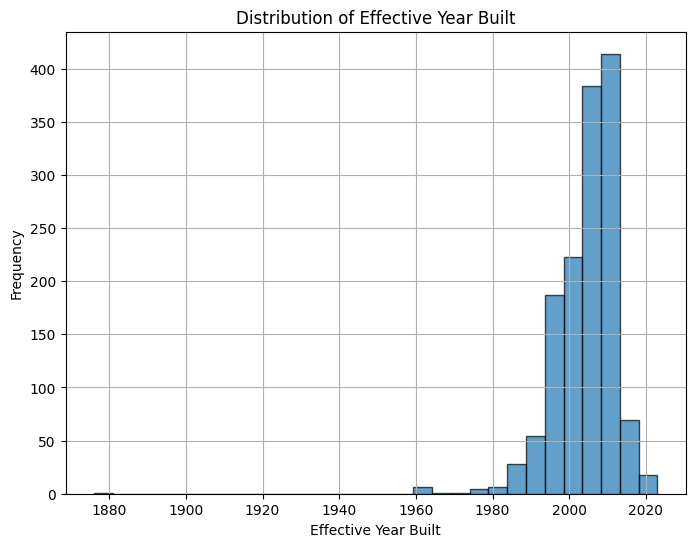

In [332]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['tax_EYB'], bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Effective Year Built")
plt.ylabel("Frequency")
plt.title("Distribution of Effective Year Built")
plt.grid(True)

# Show the plot
plt.show()

In [335]:
eyb_bins = [-float('inf'), 1980, 1990, 2000, 2010, float('inf')]

eyb_counts = pd.cut(df['tax_EYB'], bins=eyb_bins, right=True).value_counts()

# Print out the counts for each bin
print("EYB Bin Counts:")
print(eyb_counts)

EYB Bin Counts:
tax_EYB
(2000.0, 2010.0]    808
(1990.0, 2000.0]    399
(2010.0, inf]        95
(1980.0, 1990.0]     75
(-inf, 1980.0]       19
Name: count, dtype: int64


In [339]:
eyb_labels = [1, 2, 3, 4, 5]

df['eyb_class'] = pd.cut(df['tax_EYB'], bins=eyb_bins, labels=eyb_labels, right=True)

num_cols_2.append('eyb_class')
num_cols_2.remove('tax_EYB')

num_cols_2

['wui_class_6',
 'tax_EXW_WOOD',
 'tax_RCVR_WOOD',
 'tax_OPP',
 'tax_RSTR_SHED',
 'tax_EXW_MANFCTD',
 'wui_class_3',
 'tax_RSTR_MULTI_PEAK',
 'tax_RCVR_METAL',
 'wui_class_5',
 'tax_DGR',
 'tax_WBL',
 'tax_RCVR_TILE',
 'tax_RSTR_MANSARD',
 'tax_PTO',
 'fc2m',
 'fc4m',
 'fc8m',
 'fc8m+',
 'intsc_class',
 'acre_class',
 'sqft_class',
 'ssd_class',
 'eyb_class']

### Rooms in house

In [246]:
print(f'min RMS: {np.nanmin(df['tax_RMS'])}\nmax RMS: {np.nanmax(df['tax_RMS'])}')

min RMS: 0.0
max RMS: 12.0


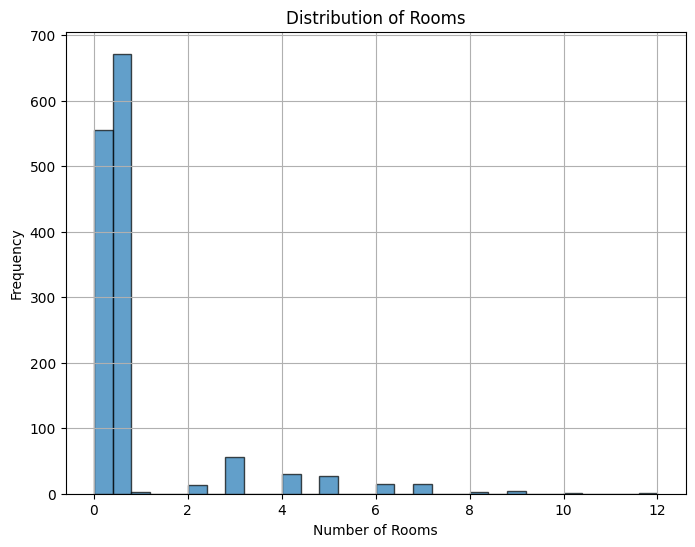

In [248]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8,6))
plt.hist(df['tax_RMS'], bins=30, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Number of Rooms")
plt.ylabel("Frequency")
plt.title("Distribution of Rooms")
plt.grid(True)

# Show the plot
plt.show()

Maybe I don't understand how rooms work, but most rooms seem to be fractional here, and very few homes have more than one room. So I am going to remove this from the cluster cols.

In [249]:
num_cols_2.remove('tax_RMS')

In [251]:
num_cols_2

['wui_class_6',
 'tax_EXW_WOOD',
 'tax_RCVR_WOOD',
 'tax_OPP',
 'tax_RSTR_SHED',
 'tax_EXW_MANFCTD',
 'wui_class_3',
 'tax_RSTR_MULTI_PEAK',
 'tax_RCVR_METAL',
 'wui_class_5',
 'tax_EYB',
 'tax_DGR',
 'tax_WBL',
 'tax_RCVR_TILE',
 'tax_RSTR_MANSARD',
 'tax_PTO',
 'fc2m',
 'fc4m',
 'fc8m',
 'fc8m+',
 'intsc_class',
 'acre_class',
 'sqft_class',
 'ssd_class']

#### Examining WUI class
Printed below are the value counts for WUI. The values are as follows:
- 1 = intermix forest
- 2 = intermix grassland
- 3 = non-WUI forest
- 4 = non-wui grassland

Therefore there is no interface WUI in Ouray County - it is all considered either intermix or non-WUI. Since there are only 4 values and they are all distiguished, I'm just going to leave them as-is.

In [252]:
df['wui_class'].value_counts()

wui_class
1    822
3    275
5    187
6    112
Name: count, dtype: int64

### t-SNE with classified numeric data
Now we run the t-SNE again to see if we get less noise and better clustering

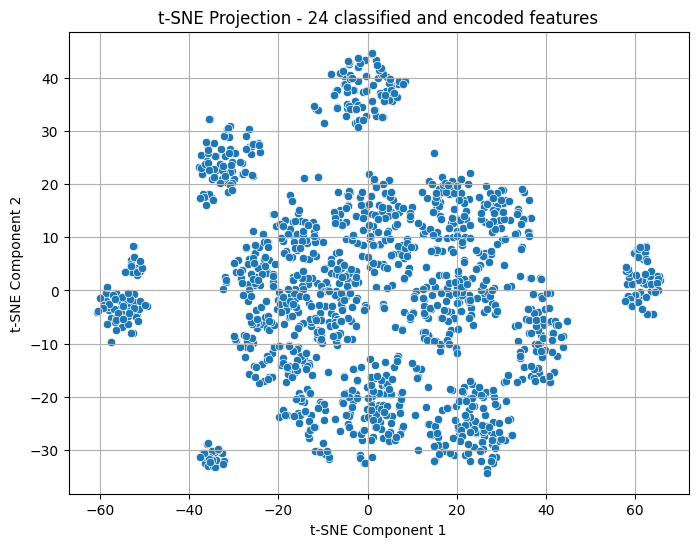

In [346]:
# Scale features
from sklearn.preprocessing import StandardScaler

# Select num_cols
df_clean = df.dropna(subset=num_cols_2).copy()
X_final = df_clean[num_cols_2]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

##################################
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=35, max_iter=999, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Visualize t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection - 24 classified and encoded features")
plt.grid()
plt.show()

In [348]:
# Save clustering dataframe for later use
df_clean[num_cols_2].to_csv(os.path.join(out, 'df_clustering.csv'))

The above plot shows clusters colored by Risk_Rating_new (my equal-breaks reclassified risk rating). I'm happy with this plot because I feel that it represents the data pretty well. Most houses are similar (large cloud in the middle) but there are certain archetypes that set some hosues apart from others (satellite clusters). The most interesting group is the tiny group on the right side of the plot that contains almost exclusively 'Extreme' risk ratings. It also shows extreme risk ratings in the original risk ratings from WRWC. This plot is good enough to start trying to cluster with K-Means, DBSCAN, and Spectral clustering. Based on previous experience with these clustering functions, I hypothesize that DBSCAN will perform the worst, and K-Means and spectral clustering will perform similarly.

We will use the elbow method to determine the k value to set for k-means clustering.

### K Means Clustering

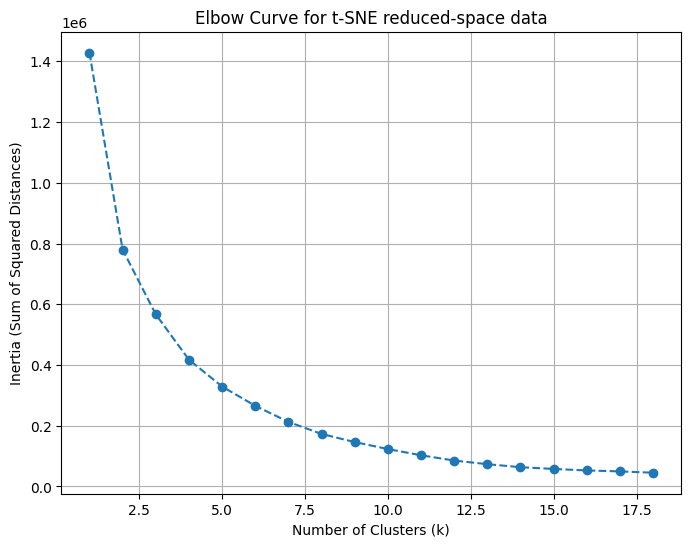

In [349]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
k_values = range(1, 19)  # Test k from 1 to 10
inertia = []  # Store inertia for each k

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tsne)  # use t-SNE-transformed data
    inertia.append(kmeans.inertia_)  # Inertia (sum of squared distances)

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Curve for t-SNE reduced-space data")
plt.grid()
plt.show()

We're not seeing a sharp drop in the elbow curve like you might expect, so we will cluster with $k = \mathbf{[6, 10, 18]}$ to see how the performance differs.

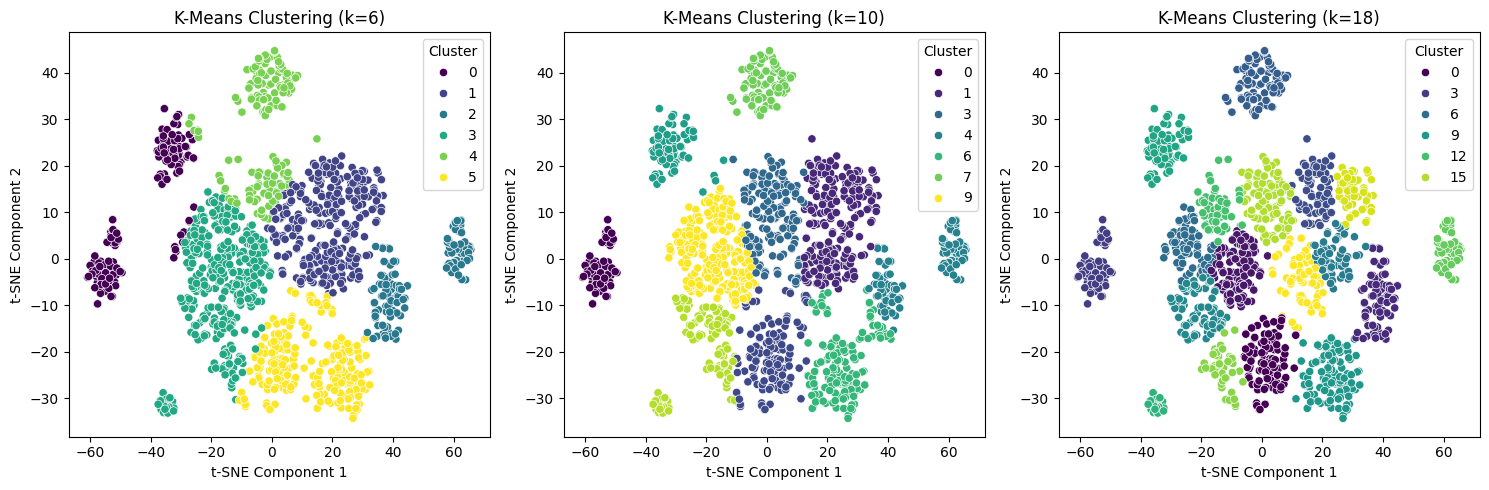

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Define k values to test
k_values = [6, 10, 18]

# Set up a 1x3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through k values and plot results
for i, k in enumerate(k_values):
    # Run K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_tsne)  # X_tsne is your t-SNE-transformed data
    
    # Scatter plot of clusters
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters, palette="viridis", ax=axes[i])
    axes[i].set_title(f"K-Means Clustering (k={k})")
    axes[i].set_xlabel("t-SNE Component 1")
    axes[i].set_ylabel("t-SNE Component 2")
    axes[i].legend(title="Cluster")

# Adjust layout
plt.tight_layout()
plt.show()


k=10 and k=18 appear to describe the data well. The upper limit for k is defined generally by the square root of samples divided by 2. So with ~1400 samples, we're looking at k=18 at the upper limit. We see diminishing return in the elbow plot aroung k=6. However, we see good segmentation, especially in the center "cloud" of the clusters. The clusters are not delineated in the way that a person would identify clusters - en axemple is the overlap of blue into yellow in the main point cloud of the center plot (k=10).

### Spectral clustering
Here, we will plot spectral clusters using the three values of k that we have plotted above.

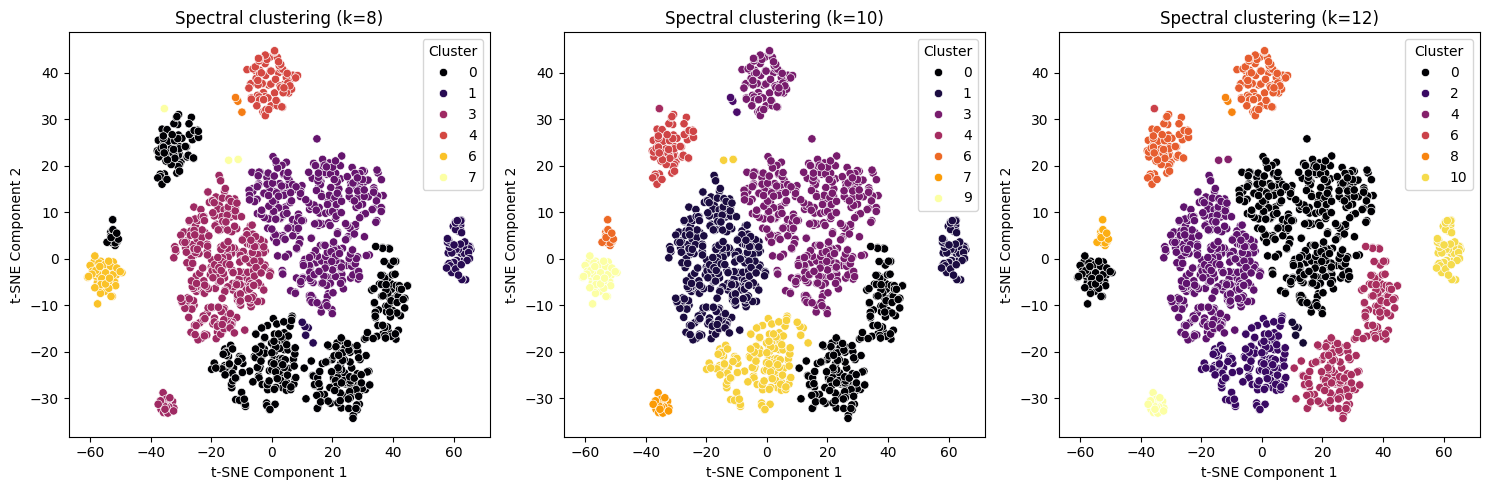

In [352]:
from sklearn.cluster import SpectralClustering as spc

# Define k values to test
k_values = [8, 10, 12]

# Set up a 1x3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through k values and plot results
for i, k in enumerate(k_values):
    # Run K-Means
    spectral = spc(n_clusters=k)
    clusters = spectral.fit_predict(X_tsne)
    
    # Scatter plot of clusters
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters, palette="inferno", ax=axes[i])
    axes[i].set_title(f"Spectral clustering (k={k})")
    axes[i].set_xlabel("t-SNE Component 1")
    axes[i].set_ylabel("t-SNE Component 2")
    axes[i].legend(title="Cluster")

plt.tight_layout()
plt.show()

In [ ]:
spectral = spc(n_clusters=12)
df_clean['cluster_spc12'] = spectral.fit_predict(X_tsne)

<Axes: >

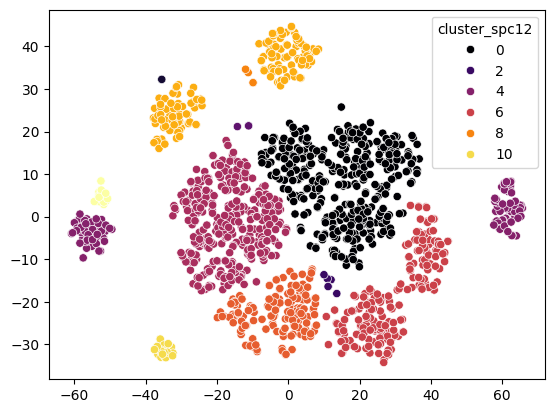

In [456]:

    
# Scatter plot of clusters
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_clean['cluster_spc12'], palette="inferno")


The above plot is a good representation of how I see clusters in the data. Is it too much? Is it too little? We will see.

<Axes: >

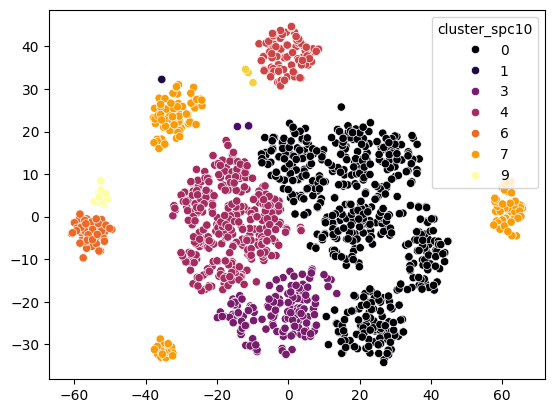

In [357]:
spectral = spc(n_clusters=10)
df_clean['cluster_spc10'] = spectral.fit_predict(X_tsne)
    
# Scatter plot of clusters
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_clean['cluster_spc10'], palette="inferno")

In [358]:
# Save clustered dataframe for later use
df_clean.to_csv(os.path.join(out, 'df_feat_clusters.csv'))

In [359]:
df1 = pd.read_csv(os.path.join(out, 'df_feat_clusters.csv'))
df1.head()

Unnamed: 0  rwra_index  feat_index    parcel_num    Year  \
0           4         5.0       921.0  4.039351e+11  2017.0   
1           5         6.0       509.0  4.039264e+11  2017.0   
2           6         7.0      1296.0  4.039263e+11  2017.0   
3           7         8.0       727.0  4.039363e+11  2017.0   
4           8         9.0      1332.0  4.039352e+11  2017.0   

               address     ParcelNum Model  Address_Visible  \
0  416 COUNTY ROAD 22A  4.039351e+11     B              5.0   
1  3100 COUNTY ROAD 22  4.039264e+11     B             15.0   
2  3245 COUNTY ROAD 22  4.039263e+11     B              0.0   
3   4452 COUNTY ROAD 1  4.039363e+11     B              5.0   
4  3479 COUNTY ROAD 22  4.039352e+11     B              5.0   

   Driveway_Clearance  Driveway_Lenth  Dist_to_Danger_Topo  Slope_Final  \
0                 0.0            11.0                  0.0          0.0   
1                 0.0            11.0                  0.0          0.0   
2                 0.0            11.0                  0.0          0.0   
3                 5.0            11.0                  0.0          0.0   
4                 5.0            11.0                  0.0          0.0   

   Background_Fuels  Defensible_Space  Roofing_Material  Building_Exterior  \
0              10.0              50.0               0.0                0.0   
1              10.0               0.0               0.0                0.0   
2              20.0              50.0               0.0                0.0   
3              10.0               0.0               0.0               70.0   
4              10.0               0.0               0.0               70.0   

   Other_Combustibles  Decks_and_Fencing  Proximity_to_Neighboring_Home  \
0                 0.0                0.0                            0.0   
1                80.0                0.0                            0.0   
2                 0.0                0.0                          100.0   
3                 0.0              100.0                           50.0   
4                80.0                0.0                            0.0   

   Ingress_Egress  Score_Final Risk_Rating        County  wui_class  \
0             0.0         76.0         Low  Ouray County          1   
1             0.0        116.0         Low  Ouray County          3   
2             0.0        181.0         Low  Ouray County          1   
3             0.0        251.0    Moderate  Ouray County          3   
4             0.0        181.0         Low  Ouray County          5   

      min_ssd  mean_cc0_2m  mean_cc2_4m  mean_cc4_8m  mean_cc8_40m  \
0  211.505051     0.048738     0.084885     0.034318       0.00000   
1  180.054332     0.023967     0.015273     0.000271       0.00004   
2    5.979973     0.032157     0.101354     0.136954       0.00000   
3   20.479874     0.025695     0.047097     0.039426       0.00012   
4  100.486083     0.018661     0.045186     0.068360       0.00000   

   intersections      PARCELNB  ACCOUNT  ACRES_calc  hiz_ext_out  tax_AIRC  \
0            0.0  4.039351e+11  R000531   32.728300        False  1 - NONE   
1            0.0  4.039264e+11  R005599    9.707660        False  1 - NONE   
2            1.0  4.039263e+11  R004277    0.822618         True  1 - NONE   
3            1.0  4.039363e+11  R004198   38.439600        False  1 - NONE   
4            0.0  4.039352e+11  R004237   12.296800         True  1 - NONE   

       tax_ARCH  tax_SQFT       tax_COND  tax_EYB  tax_EXW_PERCENT  \
0  SINGLE STORY    4034.9       3 - GOOD   2015.0            100.0   
1   MULTI STORY    1942.0  2 - VERY GOOD   2010.0            100.0   
2    COMMERCIAL    1579.0    4 - AVERAGE   2000.0            100.0   
3   MULTI STORY    2865.0       3 - GOOD   2000.0            100.0   
4   MULTI STORY    1696.0       3 - GOOD   2000.0            100.0   

      tax_EXW     tax_FLR tax_FRME  tax_HTFL  tax_INT   tax_RMS tax_RCVR  \
0  CONC/MSNRY       WDJST     WOOD       GAS  DRYWALL  0.776

In [362]:
# Make a dictionary of dataframes where each dataframe is a unique cluster
cluster_dfs = {c: df1[df1['cluster_spc12'] == c] for c in df1['cluster_spc12'].unique()}
# Save them to _out
for c, df_cluster in cluster_dfs.items():
    df_cluster.to_csv(os.path.join(out, f'spectral_cluster_{c}.csv'), index=False)

In [361]:
# What is the size of each cluster?
for c, cluster_df in cluster_dfs.items():
    print(f'Cluster {c} size: {len(cluster_df)}')

Cluster 0 size: 195
Cluster 1 size: 149
Cluster 6 size: 2
Cluster 9 size: 387
Cluster 2 size: 327
Cluster 8 size: 86
Cluster 5 size: 191
Cluster 3 size: 6
Cluster 10 size: 24
Cluster 11 size: 17
Cluster 7 size: 5
Cluster 4 size: 3


My cluster sizes are a bit uneven. I have just a few homes in 4 of the clusters (3, 4, 6, 7). Not ideal, but let's do some analysis and see where to go from there.

In [364]:
cluster_summary = df1.groupby('cluster_spc12')[num_cols_2].describe()
cluster_summary

wui_class_6                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster_spc12                                                            
0                   195.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
1                   149.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2                   327.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3                     6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4                     3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
5                   191.0  0.078534  0.269717  0.0  0.0  0.0  0.0  1.0   
6                     2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
7                     5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
8                    86.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
9                   387.0  0.002584  0.050833  0.0  0.0  0.0  0.0  1.0   
10                   24.0  0.125000  0.337832  0.0  0.0  0.0  0.0  1.0   
11                   17.0  0.117647  0.332106  0.0  0.0  0.0  0.0  1.0   

              tax_EXW_WOOD                                                \
                     count      mean       std  min   25%  50%  75%  max   
cluster_spc12                                                              
0                    195.0  0.594872  0.492180  0.0  0.00  1.0  1.0  1.0   
1                    149.0  0.570470  0.496679  0.0  0.00  1.0  1.0  1.0   
2                    327.0  0.691131  0.462735  0.0  0.00  1.0  1.0  1.0   
3                      6.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   
4                      3.0  0.666667  0.577350  0.0  0.50  1.0  1.0  1.0   
5                    191.0  0.596859  0.491818  0.0  0.00  1.0  1.0  1.0   
6                      2.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   
7                      5.0  0.400000  0.547723  0.0  0.00  0.0  1.0  1.0   
8                     86.0  0.441860  0.499521  0.0  0.00  0.0  1.0  1.0   
9                    387.0  0.273902  0.446536  0.0  0.00  0.0  1.0  1.0   
10                    24.0  0.750000  0.442326  0.0  0.75  1.0  1.0  1.0   
11                    17.0  0.411765  0.507300  0.0  0.00  0.0  1.0  1.0   

              tax_RCVR_WOOD                                               \
                      count      mean       std  min  25%  50%  75%  max   
cluster_spc12                                                              
0                     195.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
1                     149.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
2                     327.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3                       6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4                       3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
5                     191.0  0.303665  0.461048  0.0  0.0  0.0  1.0  1.0   
6                       2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
7                       5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
8                      86.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
9                     387.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
10                     24.0  0.083333  0.282330  0.0  0.0  0.0  0.0  1.0   
11                     17.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

              tax_OPP                                               \
                count      mean       std  min  25%  50%  75%  max   
cluster_spc12                                                        
0               195.0  2.235897  0.911407  1.0  1.0  3.0  3.0  3.0   
1               149.0  2.375839  0.792503  1.0  2.0  3.0  3.0  3.0   
2               327.0  2.342508  0.853788  1.0  1.5  3.0  3.0  3.0   
3                 6.0  1.333333  0.816497  1.0  1.0  1.0  1.0  3.0   
4                 3.0  1.666667  1.154701  1.0  1.0  1.0  2.0  3.0   
5               191.0  2.162304  0.894335  1.0  1.0  2.0  3.0

So I have a few interesting findings in these cluster assignments. Pessimistically, acres, sqft, intersections, and ssd do not seem to have great separation in the clusters. However, the lidar rasters have good separation. I will analyze these further. It's possible that I need to figure out a way to give more weight to the features I want to keep. Cluster 9 (index 8) is the most interesting cluster in this set to me, because almost every structure has wood roofs AND wood siding. There are 58 homes in this cluster. Structure age is poorly segmented in this group, ranging from 1961 to 2023. Since the roof architecture is 0 for all roof structure columns present, every roof has hip or gable style, meaning there are eaves. These homes have low fuel cover from 0-2m, medium fuel cover from 2-4m, high fuel cover from 4-8m, and medium fuel cover 8m+. This means that the total defensible space has a large amount of fuel in these homes. The 4m+ classes are unlikely to contain many adjacent structures because intersections are low for this class, and the property sizes are large. The square footage of the homes is medium-large, and there is medium-high structure separation distance. There is not good representation of this cluster in any of the wui classes present in the columns, meaning that there is likely higher representation in wui class 1 (intermix forest).

Note to self: I can try tweaking the cluster hyperparameters, especially $\mathbf{n}$. Try setting n to 10 or 12 instead of 15. 

Below, I plot clusters against risk ratings. The plot shows that lower clusters contain more moderate and very high risk ratings. However, there is not good separation of risk ratings in these clusters. 

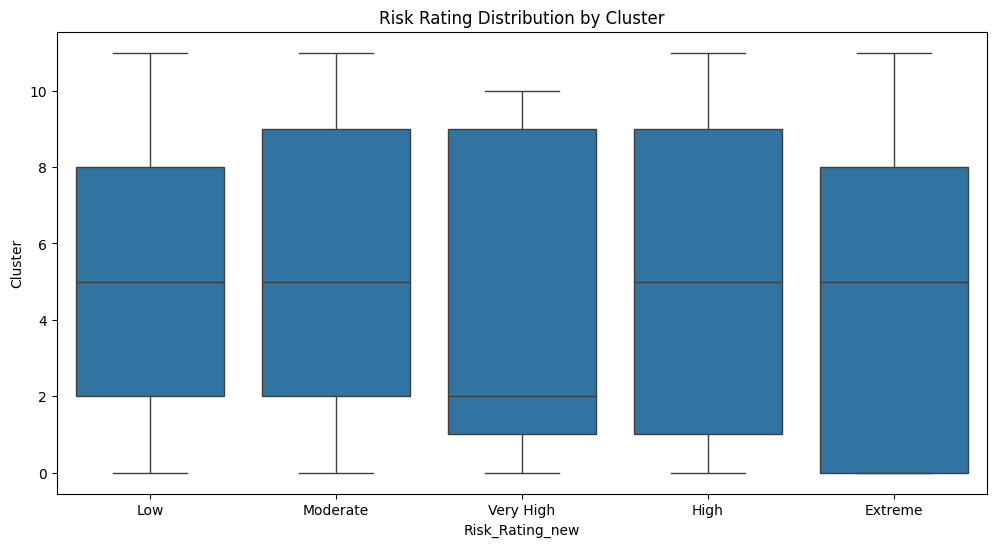

In [365]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df1['Risk_Rating_new'], y=df1['cluster_spc12'])
plt.xlabel("Risk_Rating_new")
plt.ylabel("Cluster")
plt.title("Risk Rating Distribution by Cluster")
plt.show()

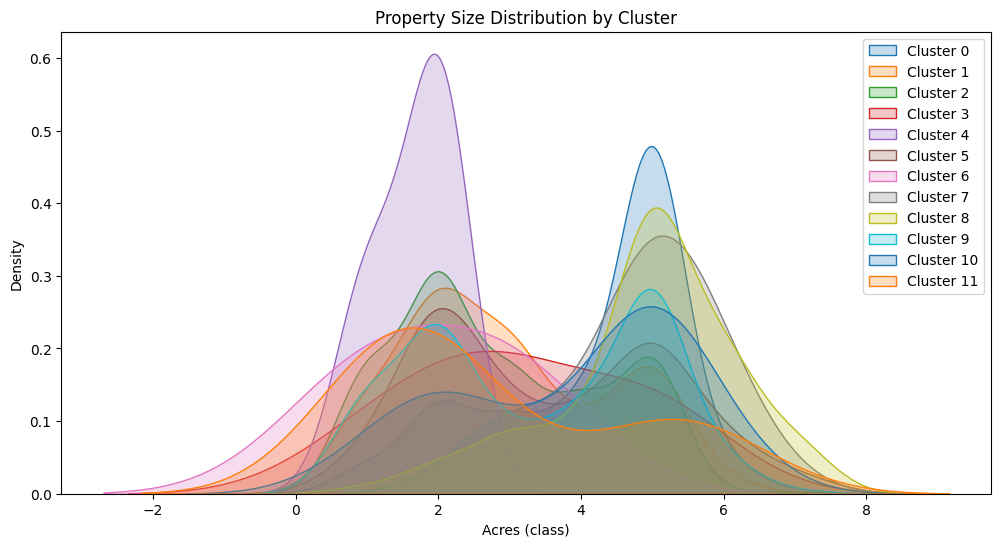

In [366]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_spc12'].unique()):
    sns.kdeplot(df1[df1['cluster_spc12'] == cluster]['acre_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Acres (class)")
plt.ylabel("Density")
plt.title("Property Size Distribution by Cluster")
plt.legend()
plt.show()

In the above plot, we see that cluster 5 contains an outsized respresenation of large properties.

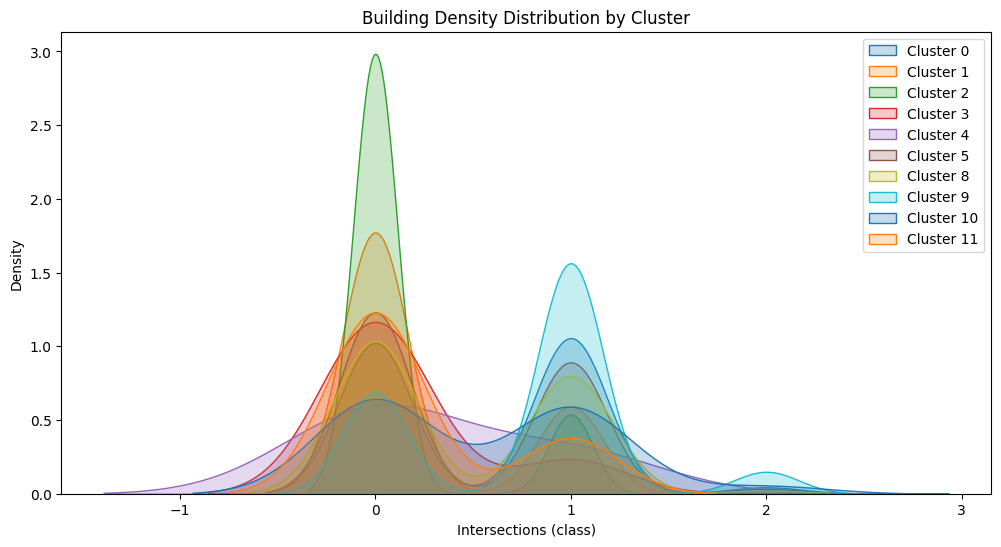

In [367]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_spc12'].unique()):
    sns.kdeplot(df1[df1['cluster_spc12'] == cluster]['intsc_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Intersections (class)")
plt.ylabel("Density")
plt.title("Building Density Distribution by Cluster")
plt.legend()
plt.show()

In the above plot, we see that Cluster 11 has a strong overrepresentation of buildings with no other homes in their HIZs. This is a useful separation.

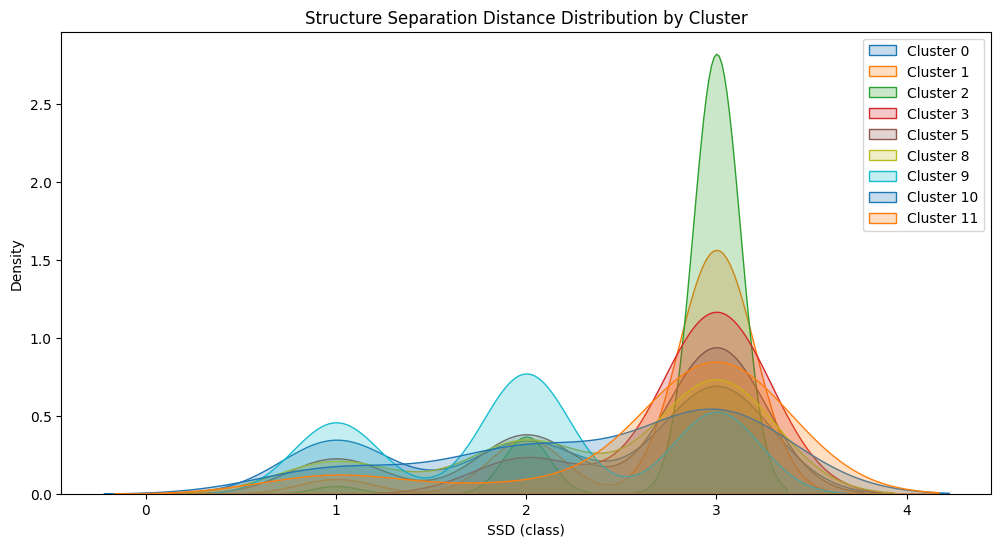

In [368]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_spc12'].unique()):
    sns.kdeplot(df1[df1['cluster_spc12'] == cluster]['ssd_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("SSD (class)")
plt.ylabel("Density")
plt.title("Structure Separation Distance Distribution by Cluster")
plt.legend()
plt.show()

In the plot above, we see that the same cluster - Cluster 11 contains an outsized representation of high structure separation distance. This is expected, as 0 intersections will not contain structures within 30m of the home.

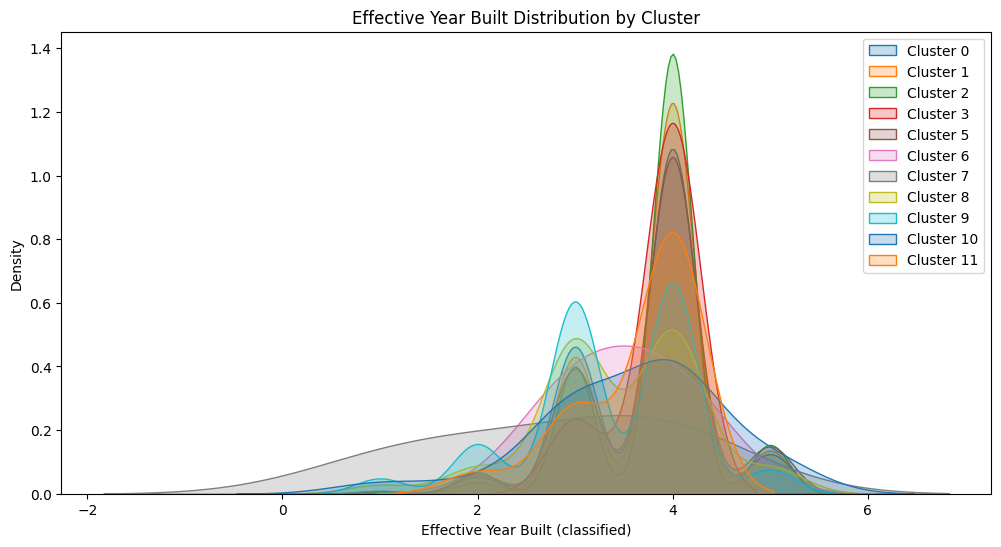

In [370]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_spc12'].unique()):
    sns.kdeplot(df1[df1['cluster_spc12'] == cluster]['eyb_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Effective Year Built (classified)")
plt.ylabel("Density")
plt.title("Effective Year Built Distribution by Cluster")
plt.legend()
plt.show()

We can see in the plot above that effective year built does not show good separation among clusters. In future improvements of this model, a couple options may improve performance:
1. Use Actual Year Built (AYB) to classify structures by age (very old, old, new, very new). 
2. Create another column called "improvements" that uses EYB and AYB to determine whether a structure has been improved and when. For instance, if AYB == EYB, this improvements would be "None". If EYB > AYB by 10 or more years, improvements would be "Old" and if EYB > AYB by 9 or fewer years, improvements would be "New." 

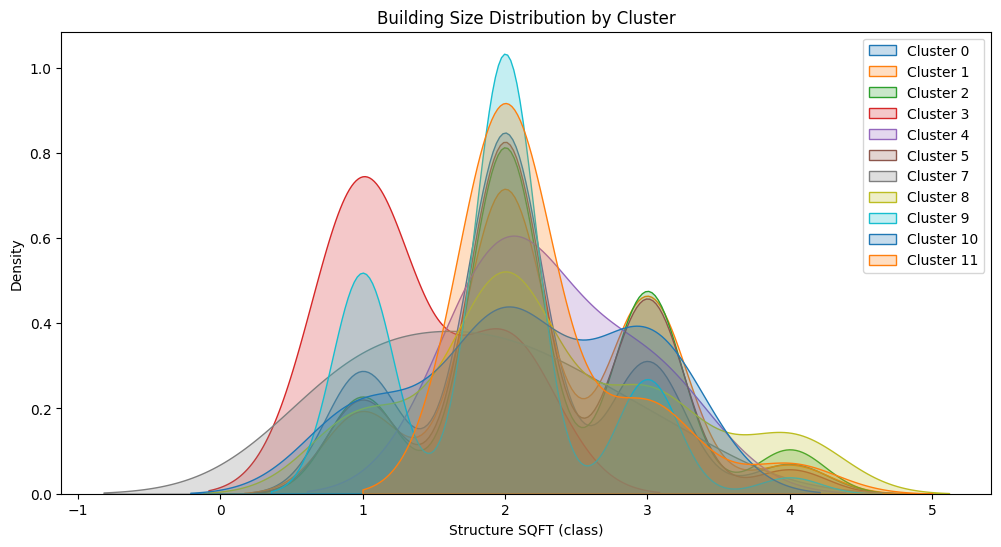

In [371]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_spc12'].unique()):
    sns.kdeplot(df1[df1['cluster_spc12'] == cluster]['sqft_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Structure SQFT (class)")
plt.ylabel("Density")
plt.title("Building Size Distribution by Cluster")
plt.legend()
plt.show()

Building SQFT does not show good separation between structures. Building size is how WUI fire spread models determine the likelihood of ignition of a structure and how they determine the heat output of a structure. Therefore, it is important to move towards improved representation of structure-to-structure fire spread in wildfire models. Future iterations of the present model should attempt to separate building size in clusters. This could possibly be accomplished by reducing the number of features in the model, or by reducing the number of clusters in the model. 

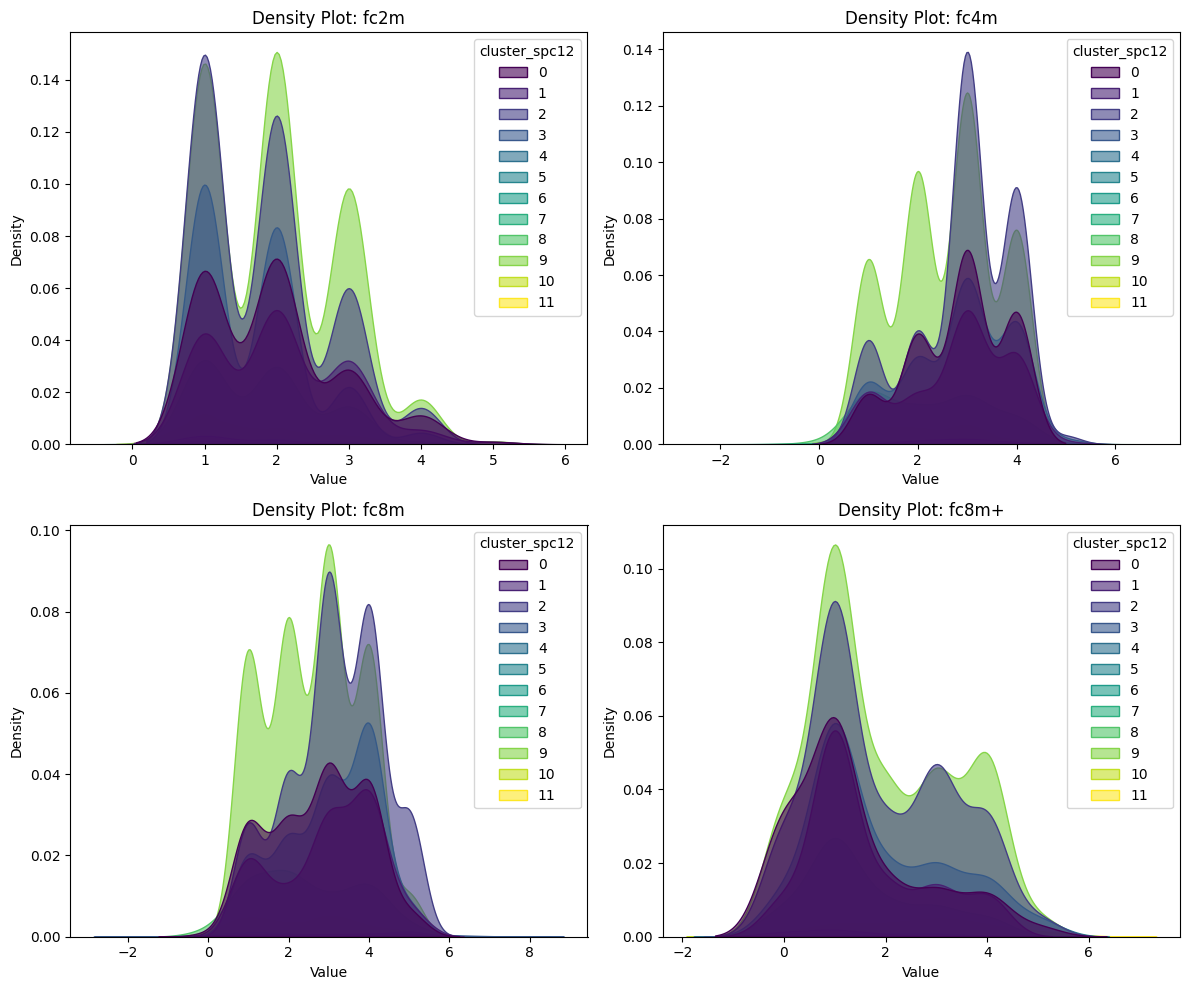

In [373]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature names and titles
features = ['fc2m', 'fc4m', 'fc8m', 'fc8m+']
titles = ['Density Plot: fc2m', 'Density Plot: fc4m', 'Density Plot: fc8m', 'Density Plot: fc8m+']

# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through features and plot density
for i, feature in enumerate(features):
    sns.kdeplot(data=df1, x=df1[feature], hue=df1['cluster_spc12'], fill=True, ax=axes[i], palette="viridis", alpha=0.6)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()


### Clustering with DBSCAN

DBSCAN has two key parameters: 
1. `eps` (epsilon) represents the maximum distance between two samples for one to be considered in the neighborhood of the other. 
2. `min_samples` (minimum samples) represents the minimum samples required to form each unique cluster.  

DBSCAN is good for clusters with similar densities.  
DBSCAN labels noise points, which is good for this data. Noise points are labeled as -1.  

In the below code, we tune the parameters to achieve a balance between including clustered points (minimizing the number of points labeled as noise) and having few clusters. It is apparent from the code that this data is somewhat disparate. Default epsilon in the DBSCAN algorithm is 0.5. If we set epsilon to 0.5, we have to set min_samples to 3 in order to have more than 1 cluster. This means that with the default epsilon value, most points are considered noise. We require a minimum sample size of 15 for clusters, so we will adjust accordingly. The two plots below demonstrate the sensitivity of this dataset to adjustments of the epsilon value. The first plot shows `esp=4` and the next shows `eps=2.5`.

In [440]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define DBSCAN parameters
eps = 4  # Adjust based on your data
min_samples = 15  # Minimum points to form a dense cluster

# Run DBSCAN on t-SNE data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df1['cluster_dbscan'] = dbscan.fit_predict(X_tsne)  # Assign clusters

# Print unique cluster labels
print(f"DBSCAN found {df1['cluster_dbscan'].nunique()} clusters (including noise)")

DBSCAN found 12 clusters (including noise)


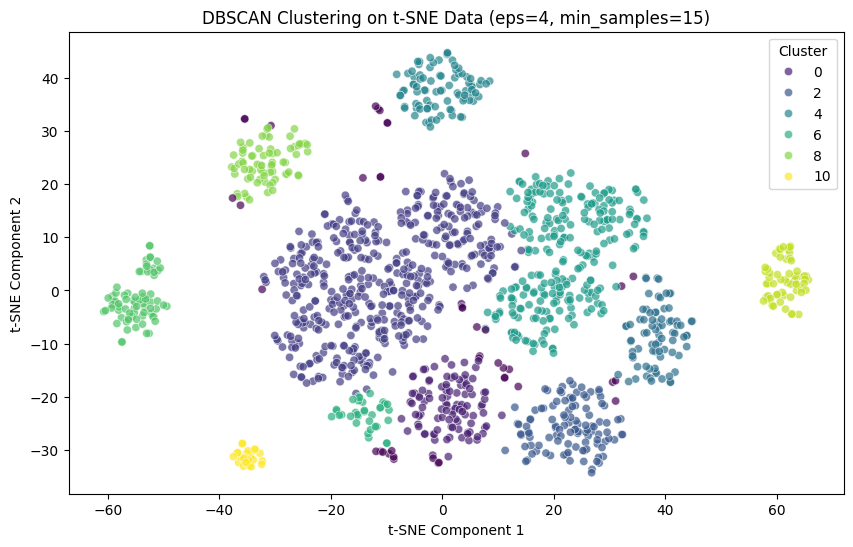

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df1['cluster_dbscan'], palette="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("DBSCAN Clustering on t-SNE Data (eps=4, min_samples=15)")
plt.legend(title="Cluster")
plt.show()

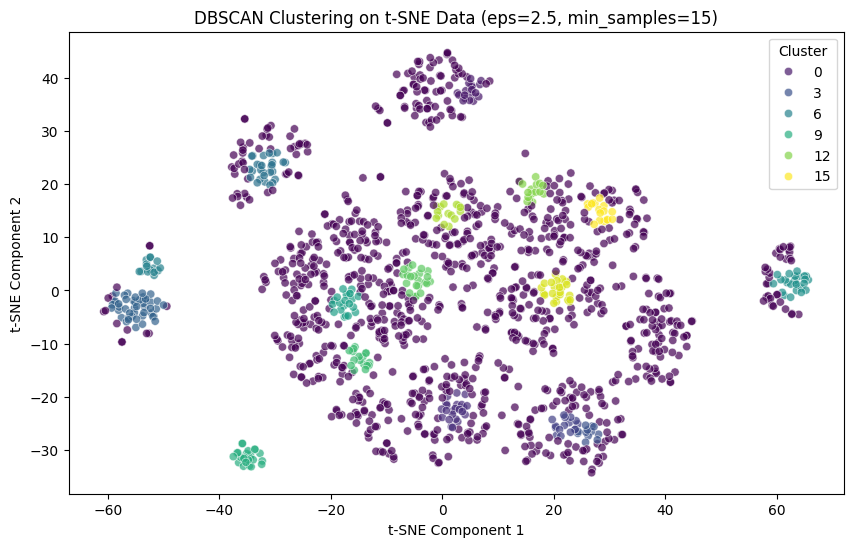

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df1['cluster_dbscan'], palette="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("DBSCAN Clustering on t-SNE Data (eps=2.5, min_samples=15)")
plt.legend(title="Cluster")
plt.show()

In [442]:
import numpy as np

# Count number of points in each cluster
cluster_counts = df1['cluster_dbscan'].value_counts().sort_index()
print(cluster_counts)


cluster_dbscan
-1      43
 0     102
 1     457
 2     110
 3      80
 4      86
 5     251
 6      34
 7      75
 8      72
 9      58
 10     24
Name: count, dtype: int64


In [446]:
# Group by DBSCAN clusters and compute mean values for features
cluster_summary = df1.groupby('cluster_dbscan')[num_cols_2].describe()
cluster_summary

wui_class_6                                               \
                     count      mean       std  min  25%  50%  75%  max   
cluster_dbscan                                                            
-1                    43.0  0.139535  0.350605  0.0  0.0  0.0  0.0  1.0   
 0                   102.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 1                   457.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 2                   110.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 3                    80.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 4                    86.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
 5                   251.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 6                    34.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 7                    75.0  0.066667  0.251124  0.0  0.0  0.0  0.0  1.0   
 8                    72.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
 9                    58.0  0.206897  0.408619  0.0  0.0  0.0  0.0  1.0   
 10                   24.0  0.125000  0.337832  0.0  0.0  0.0  0.0  1.0   

               tax_EXW_WOOD                                                \
                      count      mean       std  min   25%  50%  75%  max   
cluster_dbscan                                                              
-1                     43.0  0.255814  0.441481  0.0  0.00  0.0  0.5  1.0   
 0                    102.0  0.637255  0.483166  0.0  0.00  1.0  1.0  1.0   
 1                    457.0  0.722101  0.448454  0.0  0.00  1.0  1.0  1.0   
 2                    110.0  0.600000  0.492140  0.0  0.00  1.0  1.0  1.0   
 3                     80.0  0.587500  0.495390  0.0  0.00  1.0  1.0  1.0   
 4                     86.0  0.441860  0.499521  0.0  0.00  0.0  1.0  1.0   
 5                    251.0  0.015936  0.125479  0.0  0.00  0.0  0.0  1.0   
 6                     34.0  0.500000  0.507519  0.0  0.00  0.5  1.0  1.0   
 7                     75.0  0.373333  0.486947  0.0  0.00  0.0  1.0  1.0   
 8                     72.0  0.569444  0.498629  0.0  0.00  1.0  1.0  1.0   
 9                     58.0  0.844828  0.365231  0.0  1.00  1.0  1.0  1.0   
 10                    24.0  0.750000  0.442326  0.0  0.75  1.0  1.0  1.0   

               tax_RCVR_WOOD                                              \
                       count      mean      std  min  25%  50%  75%  max   
cluster_dbscan                                                             
-1                      43.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 0                     102.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 1                     457.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 2                     110.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 3                      80.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 4                      86.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 5                     251.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 6                      34.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 7                      75.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 8                      72.0  0.000000  0.00000  0.0  0.0  0.0  0.0  0.0   
 9                      58.0  1.000000  0.00000  1.0  1.0  1.0  1.0  1.0   
 10                     24.0  0.083333  0.28233  0.0  0.0  0.0  0.0  1.0   

               tax_OPP                                               \
                 count      mean       std  min  25%  50%  75%  max   
cluster_dbscan                                                        
-1                43.0  1.953488  0.871602  1.0  1.0  2.0  3.0  3.0   
 0               102.0  2.343137  0.802164  1.0  2.0  3.0  3.0  3.0   
 1               457.0  2.286652  0.865327  1.0  1.0  3.0  3.0  3.0   
 2               110.0  2.145455  0.936873  1.0  1.0  3.0  3.0  3.0   
 3                80.0  2.350000  0.887323  1.0  1.0  3.0  3.0  3.0   
 4                86.0  

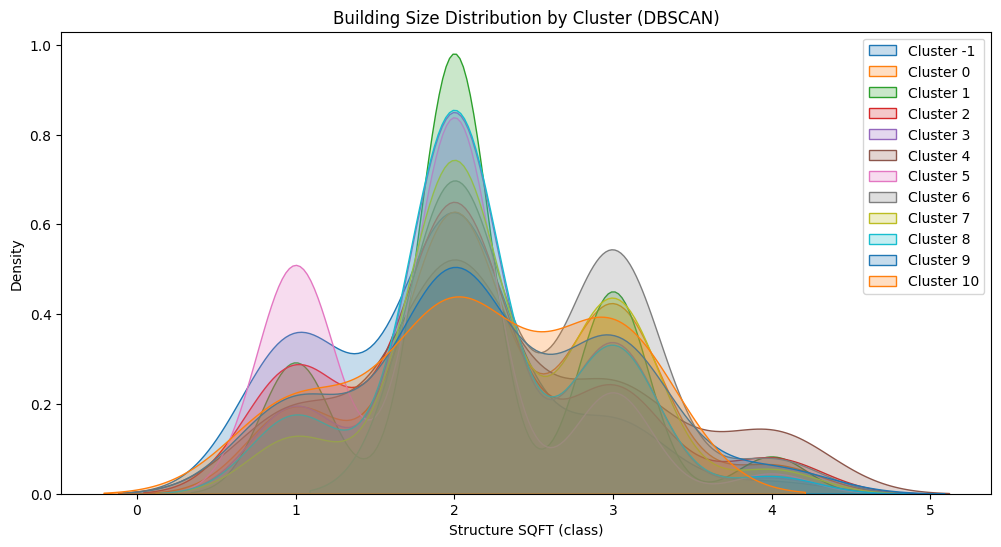

In [447]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_dbscan'].unique()):
    sns.kdeplot(df1[df1['cluster_dbscan'] == cluster]['sqft_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Structure SQFT (class)")
plt.ylabel("Density")
plt.title("Building Size Distribution by Cluster (DBSCAN)")
plt.legend()
plt.show()

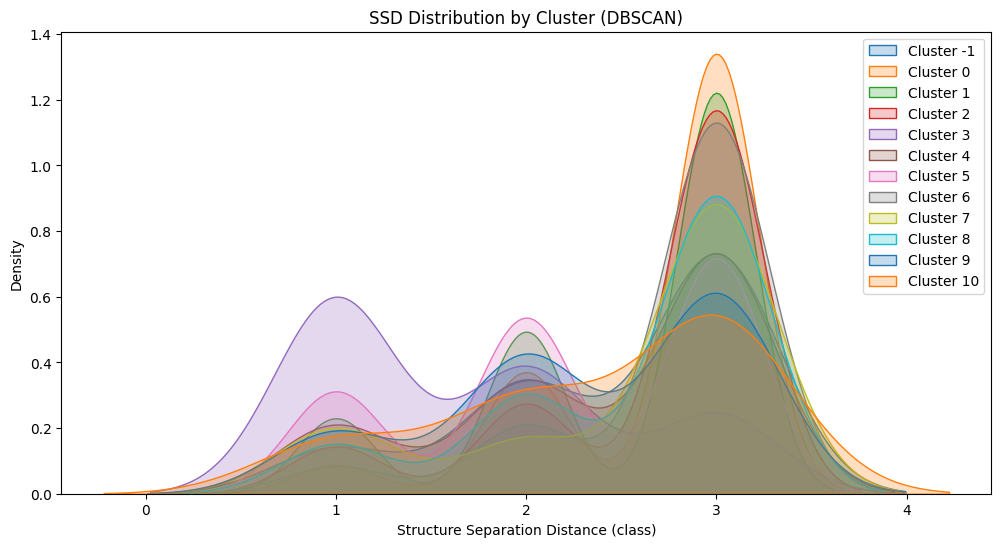

In [448]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_dbscan'].unique()):
    sns.kdeplot(df1[df1['cluster_dbscan'] == cluster]['ssd_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Structure Separation Distance (class)")
plt.ylabel("Density")
plt.title("SSD Distribution by Cluster (DBSCAN)")
plt.legend()
plt.show()

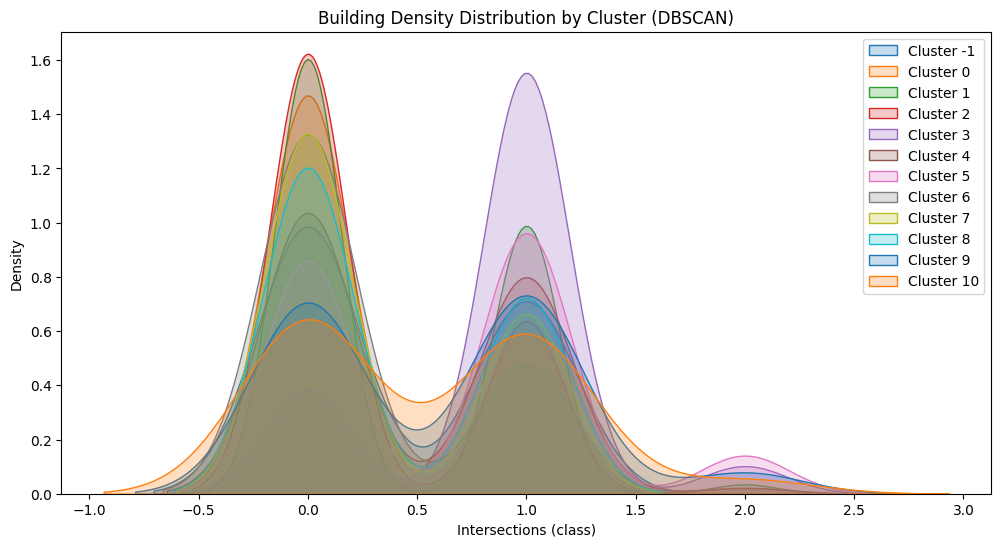

In [450]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_dbscan'].unique()):
    sns.kdeplot(df1[df1['cluster_dbscan'] == cluster]['intsc_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Intersections (class)")
plt.ylabel("Density")
plt.title("Building Density Distribution by Cluster (DBSCAN)")
plt.legend()
plt.show()

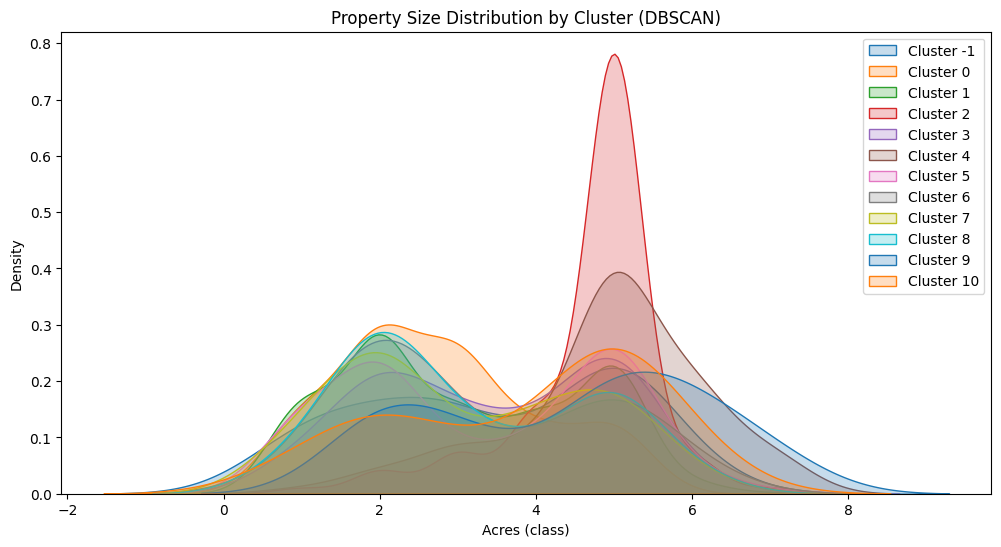

In [449]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_dbscan'].unique()):
    sns.kdeplot(df1[df1['cluster_dbscan'] == cluster]['acre_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Acres (class)")
plt.ylabel("Density")
plt.title("Property Size Distribution by Cluster (DBSCAN)")
plt.legend()
plt.show()

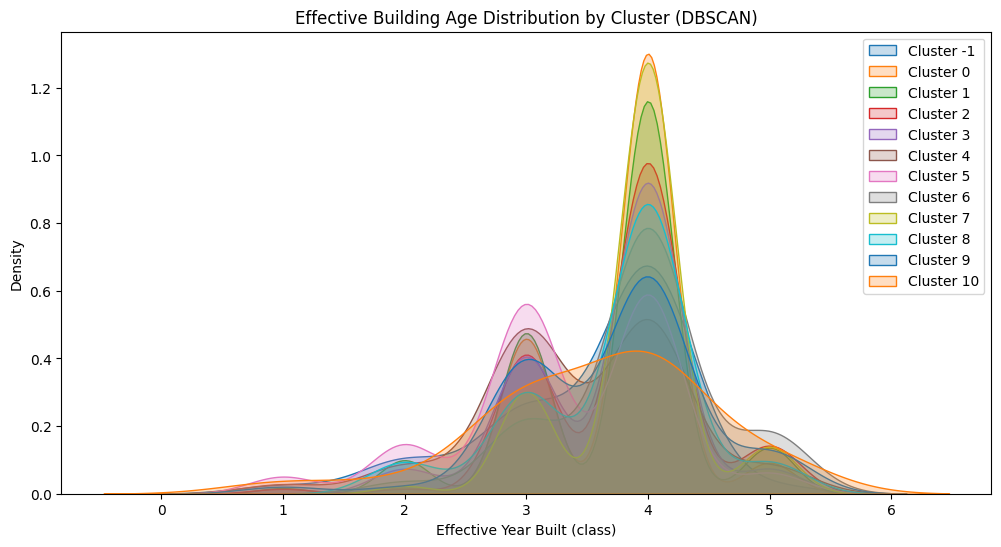

In [451]:
plt.figure(figsize=(12,6))
for cluster in sorted(df1['cluster_dbscan'].unique()):
    sns.kdeplot(df1[df1['cluster_dbscan'] == cluster]['eyb_class'], label=f"Cluster {cluster}", shade=True)

plt.xlabel("Effective Year Built (class)")
plt.ylabel("Density")
plt.title("Effective Building Age Distribution by Cluster (DBSCAN)")
plt.legend()
plt.show()

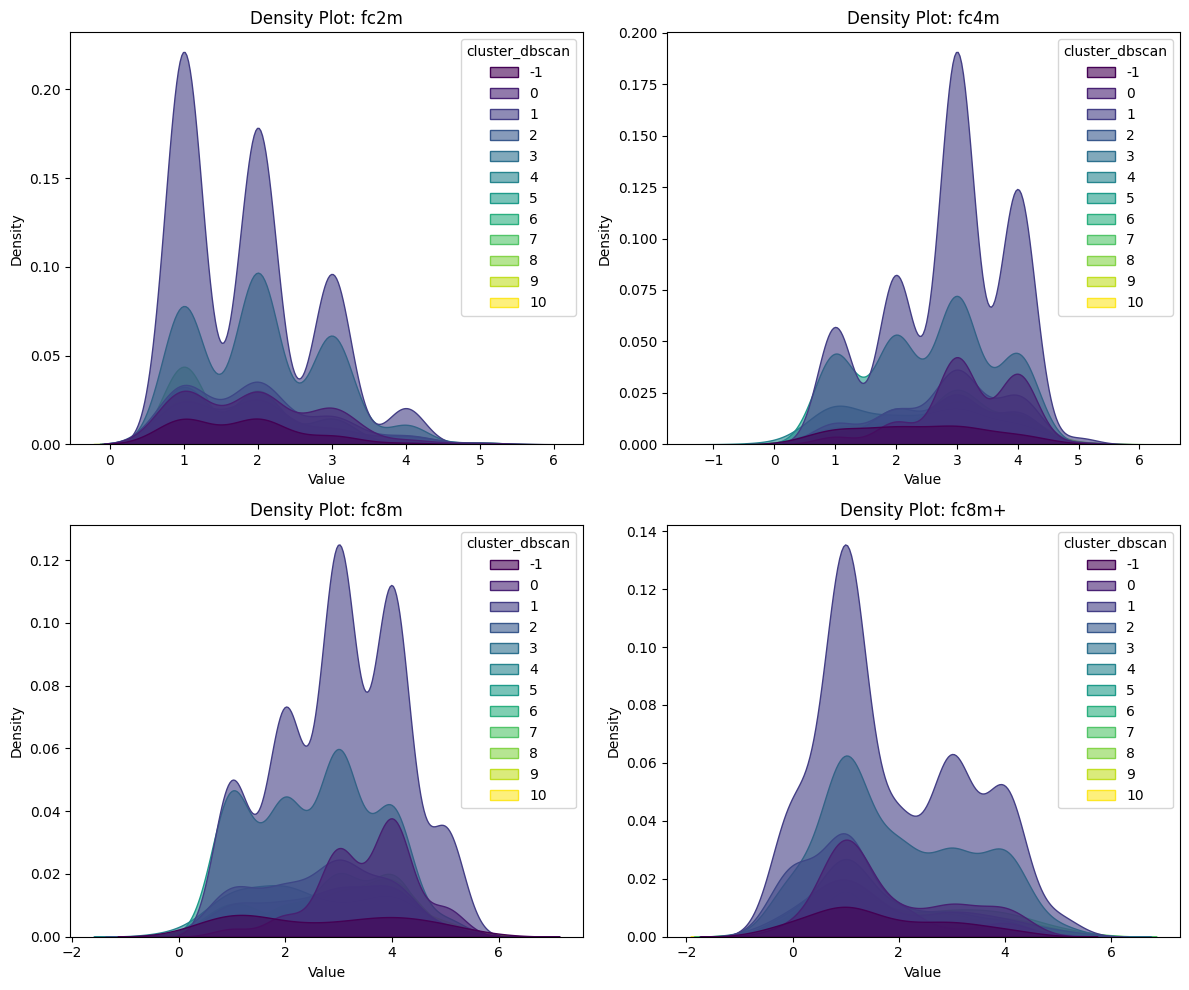

In [452]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define feature names and titles
features = ['fc2m', 'fc4m', 'fc8m', 'fc8m+']
titles = ['Density Plot: fc2m', 'Density Plot: fc4m', 'Density Plot: fc8m', 'Density Plot: fc8m+']

# Set up 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through features and plot density
for i, feature in enumerate(features):
    sns.kdeplot(data=df1, x=df1[feature], hue=df1['cluster_dbscan'], fill=True, ax=axes[i], palette="viridis", alpha=0.6)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()

In [457]:
# Save clustered dataframe for later use
df1.to_csv(os.path.join(out, 'df_feat_clusters.csv'), index=False)

**Conclusions (initial)** I have tested three different types of clustering with mixed results. Spectral clustering seems to perform the best based on visual inspection and density plots. It is clear that there is excessive noise in this data. Some structure archetypes are evident, but further analysis is required. This analysis will be conducted in the next notebook of the workflow, `structure_archetypes.ipynb`. 